In [ ]:
# Загрузим нужные библиотеки.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
from numpy import mean, std
import xgboost as xgb
from xgboost import XGBClassifier
from IPython.display import display

In [ ]:
# Загрузим датасет.
fich =  pd.read_csv("/content/Dataset.csv")
display(fich.head())

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [ ]:
# Получим основную информацию.
fich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247950 entries, 0 to 247949
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       247950 non-null  int64  
 1   url_length                                 247950 non-null  int64  
 2   number_of_dots_in_url                      247950 non-null  int64  
 3   having_repeated_digits_in_url              247950 non-null  int64  
 4   number_of_digits_in_url                    247950 non-null  int64  
 5   number_of_special_char_in_url              247950 non-null  int64  
 6   number_of_hyphens_in_url                   247950 non-null  int64  
 7   number_of_underline_in_url                 247950 non-null  int64  
 8   number_of_slash_in_url                     247950 non-null  int64  
 9   number_of_questionmark_in_url              247950 non-null  int64  
 10  number_o

# **I. Разведывательный анализ. Знакомство с данными. Очистка данных.**

In [ ]:
# Посмотрим показатели описательной статистики.
print("\nОписательная статистика:")
df_1 = display(fich.describe(include='all'))
stat = pd.DataFrame(df_1)


Описательная статистика:


,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
count,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,...,247950.000000,247950.000000,247950.0,247950.0,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000
mean,0.481585,58.358197,2.894075,0.162351,4.366070,10.303218,0.600867,0.204049,4.784533,0.159911,...,0.064529,0.224013,1.0,0.0,2.606977,0.126501,0.002303,0.000944,4.257222,3.389839
std,0.499662,29.764620,1.690970,0.368773,9.579032,4.718381,1.235599,0.653502,1.812574,0.449506,...,0.245694,1.276447,0.0,0.0,1.636938,0.332414,0.047933,0.030706,0.328098,0.376361
min,0.000000,12.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,2.648939,1.386274
25%,0.000000,39.000000,2.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.038910,3.180833
50%,0.000000,49.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.208298,3.392747
75%,1.000000,69.000000,3.000000,0.000000,4.000000,11.000000,1.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,1.0,0.0,3.000000,0.000000,0.000000,0.000000,4.428036,3.606937
max,1.000000,191.000000,28.000000,1.000000,144.000000,75.000000,23.000000,47.000000,30.000000,17.000000,...,1.000000,44.000000,1.0,0.0,28.000000,1.000000,1.000000,1.000000,5.866327,4.957323


In [ ]:
# Проанализируем целевую переменную. Проверяем сбалансирован ли датасет?
# Посмотрим, нет ли пропусков в целевой переменной. Из этого кода мы видим, что пропусков у нас нет.
fich['Type'].value_counts()

,count
Type,
0,128541
1,119409


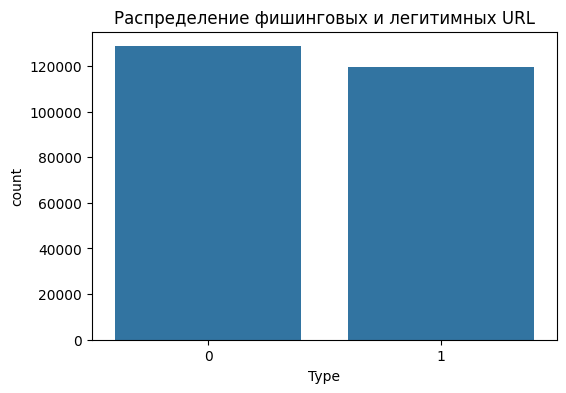

In [ ]:
# Посмотрим на распределение классов (фишинг = 1 / легитимные = 0). А так же в процентном соотношении.
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=fich)
plt.title("Распределение фишинговых и легитимных URL")
plt.show()

In [ ]:
# Процентное соотношение. Исходя из этого кода, можно сделать вывод, что датасет у нас достаточно сбалансирован: у нас пополам фишинговых и легитимных URL.
class_dist = fich['Type'].value_counts(normalize=True) * 100
print(f"Фишинг: {class_dist[1]:.2f}% vs Легитимные: {class_dist[0]:.2f}%")

Фишинг: 48.16% vs Легитимные: 51.84%


In [ ]:
# Проанализируем датасет на предмет пропусков, значений NULL.
df_NaN = fich
fich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247950 entries, 0 to 247949
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       247950 non-null  int64  
 1   url_length                                 247950 non-null  int64  
 2   number_of_dots_in_url                      247950 non-null  int64  
 3   having_repeated_digits_in_url              247950 non-null  int64  
 4   number_of_digits_in_url                    247950 non-null  int64  
 5   number_of_special_char_in_url              247950 non-null  int64  
 6   number_of_hyphens_in_url                   247950 non-null  int64  
 7   number_of_underline_in_url                 247950 non-null  int64  
 8   number_of_slash_in_url                     247950 non-null  int64  
 9   number_of_questionmark_in_url              247950 non-null  int64  
 10  number_o

In [ ]:
# Проанализируем на предмет стандартных пропусков (NaN, None).
print("Анализ стандартных пропусков:")
missing_values = df_NaN.isnull().sum()
missing_percent = (missing_values / len(df_NaN)) * 100
missing_report = pd.DataFrame({
    'Колонка': missing_values.index,
    'Количество пропусков': missing_values.values,
    'Процент пропусков': missing_percent.values
})
display(missing_report.sort_values('Количество пропусков', ascending=False))

Анализ стандартных пропусков:


,Колонка,Количество пропусков,Процент пропусков
0,Type,0,0.0
1,url_length,0,0.0
2,number_of_dots_in_url,0,0.0
3,having_repeated_digits_in_url,0,0.0
4,number_of_digits_in_url,0,0.0
5,number_of_special_char_in_url,0,0.0
6,number_of_hyphens_in_url,0,0.0
7,number_of_underline_in_url,0,0.0
8,number_of_slash_in_url,0,0.0
9,number_of_questionmark_in_url,0,0.0


In [ ]:
# Сделаем проверку на наличие специальных значений.
print("\nАнализ специальных значений:")
special_values = ['null', 'NULL', 'None', 'NaN', 'NA', '?', '-', '--', 'n/a', 'N/A', 'missing']

# Функция для подсчета специальных значений в конкретной колонке
def count_special(col):
    return sum(df_NaN[col].astype(str).str.strip().isin(special_values))# Преобразуем значения в строку, удаляем пробелы по краям и проверяем наличие в special_values

special_counts = {col: count_special(col) for col in df_NaN.columns} # Создаем словарь с подсчетом специальных значений для каждой колонки. Ключи - названия колонок, значения - количество спецзначений
special_percent = {col: (count / len(df_NaN)) * 100 for col, count in special_counts.items()} # Создаем словарь с процентами специальных значений для каждой колонки. Процент рассчитывается как доля от общего количества строк

# Формируем отчет в виде DataFrame для удобного отображения
special_report = pd.DataFrame({
    'Колонка': special_counts.keys(),
    'Количество спец. значений': special_counts.values(),
    'Процент спец. значений': special_percent.values()
})
display(special_report.sort_values('Количество спец. значений', ascending=False))


Анализ специальных значений:


,Колонка,Количество спец. значений,Процент спец. значений
0,Type,0,0.0
1,url_length,0,0.0
2,number_of_dots_in_url,0,0.0
3,having_repeated_digits_in_url,0,0.0
4,number_of_digits_in_url,0,0.0
5,number_of_special_char_in_url,0,0.0
6,number_of_hyphens_in_url,0,0.0
7,number_of_underline_in_url,0,0.0
8,number_of_slash_in_url,0,0.0
9,number_of_questionmark_in_url,0,0.0


In [ ]:
# Посмотрим количество пустых строк.
print("\nАнализ пустых строк:")
empty_strings = (df_NaN.applymap(lambda x: str(x).strip() == '')).sum()
empty_percent = (empty_strings / len(df_NaN)) * 100
empty_report = pd.DataFrame({
    'Колонка': empty_strings.index,
    'Количество пустых строк': empty_strings.values,
    'Процент пустых строк': empty_percent.values
})
display(empty_report.sort_values('Количество пустых строк', ascending=False))


Анализ пустых строк:


<ipython-input-11-926fc23f6b87>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_strings = (df_NaN.applymap(lambda x: str(x).strip() == '')).sum()


,Колонка,Количество пустых строк,Процент пустых строк
0,Type,0,0.0
1,url_length,0,0.0
2,number_of_dots_in_url,0,0.0
3,having_repeated_digits_in_url,0,0.0
4,number_of_digits_in_url,0,0.0
5,number_of_special_char_in_url,0,0.0
6,number_of_hyphens_in_url,0,0.0
7,number_of_underline_in_url,0,0.0
8,number_of_slash_in_url,0,0.0
9,number_of_questionmark_in_url,0,0.0


In [ ]:
# Сделаем проверку на дубликаты.
print("Количество полных дубликатов:", fich.duplicated().sum())

Количество полных дубликатов: 118172


In [ ]:
# Проверка строгих дубликатов.
duplicates = fich[fich.duplicated(keep=False)]  # keep=False помечает все дубли
print(f"Найдено {len(duplicates)} полных дубликатов.")

Найдено 193545 полных дубликатов.


 Выводы.

*   Строгие дубликаты обычно просто удаляются, оставляется только первое вхождение. Но в нашем датасете их очень большое количество, поэтому предложение их просто оставить как есть, ведь URL могут полностью повторяться.
*   Из кода выше мы видим, что пропусков, значений NAN, пустых строк как таковых в нашем датасете нет.

In [ ]:
# Проанализируем наш датасет на выбросы.
# Еще раз получаем сводную статистику.
stat = fich.describe(include='all').T  # .T — транспонируем для удобства

# Добавляем IQR и границы выбросов (только для числовых столбцов)
numeric_cols = fich.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if col in stat.index:
        q1 = stat.loc[col, '25%']
        q3 = stat.loc[col, '75%']
        iqr = q3 - q1
        stat.loc[col, 'IQR'] = iqr
        stat.loc[col, 'lower_bound'] = q1 - 1.5 * iqr
        stat.loc[col, 'upper_bound'] = q3 + 1.5 * iqr

stat.head()

,count,mean,std,min,25%,50%,75%,max,IQR,lower_bound,upper_bound
Type,247950.0,0.481585,0.499662,0.0,0.0,0.0,1.0,1.0,1.0,-1.5,2.5
url_length,247950.0,58.358197,29.764620,12.0,39.0,49.0,69.0,191.0,30.0,-6.0,114.0
number_of_dots_in_url,247950.0,2.894075,1.690970,0.0,2.0,3.0,3.0,28.0,1.0,0.5,4.5
having_repeated_digits_in_url,247950.0,0.162351,0.368773,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
number_of_digits_in_url,247950.0,4.366070,9.579032,0.0,0.0,0.0,4.0,144.0,4.0,-6.0,10.0


In [ ]:
# Еще раз рассчитаем IQR и границы выбросов, выведем ключевые столбцы, а потом выведем ТОП-10 признаков с наибольшим числом выбросов.
stat['IQR'] = stat['75%'] - stat['25%']
stat['lower_bound'] = stat['25%'] - 1.5 * stat['IQR']
stat['upper_bound'] = stat['75%'] + 1.5 * stat['IQR']

display(stat[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'lower_bound', 'upper_bound']].head(10))

,mean,std,min,25%,50%,75%,max,IQR,lower_bound,upper_bound
Type,0.481585,0.499662,0.0,0.0,0.0,1.0,1.0,1.0,-1.5,2.5
url_length,58.358197,29.764620,12.0,39.0,49.0,69.0,191.0,30.0,-6.0,114.0
number_of_dots_in_url,2.894075,1.690970,0.0,2.0,3.0,3.0,28.0,1.0,0.5,4.5
having_repeated_digits_in_url,0.162351,0.368773,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
number_of_digits_in_url,4.366070,9.579032,0.0,0.0,0.0,4.0,144.0,4.0,-6.0,10.0
number_of_special_char_in_url,10.303218,4.718381,4.0,7.0,9.0,11.0,75.0,4.0,1.0,17.0
number_of_hyphens_in_url,0.600867,1.235599,0.0,0.0,0.0,1.0,23.0,1.0,-1.5,2.5
number_of_underline_in_url,0.204049,0.653502,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0
number_of_slash_in_url,4.784533,1.812574,2.0,4.0,4.0,5.0,30.0,1.0,2.5,6.5
number_of_questionmark_in_url,0.159911,0.449506,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0


In [ ]:
#ТОП-10 признаков с наибольшим числом выбросов.
outliers_count = {}
for col in fich.select_dtypes(include='number').columns:
    lower = stat.loc[col, 'lower_bound']
    upper = stat.loc[col, 'upper_bound']
    outliers_count[col] = fich[(fich[col] < lower) | (fich[col] > upper)].shape[0]

outliers_series = pd.Series(outliers_count).sort_values(ascending=False)
print("Топ-10 признаков с наибольшим числом выбросов:")
display(outliers_series.head(10))

Топ-10 признаков с наибольшим числом выбросов:


,0
number_of_subdomains,100239
having_special_characters_in_domain,48193
number_of_special_characters_in_domain,48193
having_repeated_digits_in_url,40255
number_of_slash_in_url,36217
number_of_equal_in_url,32603
number_of_underline_in_url,32325
number_of_questionmark_in_url,31758
having_query,31366
number_of_digits_in_url,30441


In [ ]:
# А теперь сделаем отбор наиболее значимых признаков в нашем датасете.
# Разделим на признаки и целевую переменную.
fich_copy = fich.copy(deep=True)

X = fich_copy.drop('Type', axis=1)
y = fich_copy['Type']

In [ ]:
# Отберем наиболее значимые признаки.
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Наиболее значимые признаки:")
display(selected_features)

Наиболее значимые признаки:


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [24 25 27 28 29 33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['url_length', 'number_of_dots_in_url', 'having_repeated_digits_in_url',
       'number_of_digits_in_url', 'number_of_special_char_in_url',
       'number_of_slash_in_url', 'number_of_questionmark_in_url',
       'number_of_equal_in_url', 'domain_length', 'number_of_dots_in_domain',
       'having_digits_in_domain', 'number_of_digits_in_domain',
       'having_repeated_digits_in_domain', 'average_subdomain_length',
       'having_digits_in_subdomain', 'number_of_digits_in_subdomain',
       'path_length', 'having_query', 'entropy_of_url', 'entropy_of_domain'],
      dtype='object')

Сопоставив список признаков, "с наибольшим числом выбросов" и "наиболее значимые признаки", мы видим, что вот эти признаки попадают в категорию наиболее важных.

Вот предложения по обработке каждого. Так же предлагаю обработать и те, что не вошли в ТОП значимых, но имеют самое большое количество выбросов.

'having_repeated_digits_in_url',

 'number_of_digits_in_url',

 'number_of_slash_in_url',

 'number_of_questionmark_in_url',

 'number_of_equal_in_url',

 'having_query'

In [ ]:
# Функция для обработки выбросов на основе IQR
def treat_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    # Заменяем выбросы на граничные значения
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# 1. number_of_subdomains - количество поддоменов
fich = treat_outliers(fich, 'number_of_subdomains')
fich['number_of_subdomains'] = np.log1p(fich['number_of_subdomains'])  # Логарифмирование
print("1. Обработано number_of_subdomains: ограничение по IQR + логарифмирование")

# 2-3. Спецсимволы в домене
fich['having_special_characters_in_domain'] = fich['having_special_characters_in_domain'].astype(int)
fich = treat_outliers(fich, 'number_of_special_characters_in_domain')
print("2-3. having_special_characters_in_domain: бинаризация\nnumber_of_special_characters_in_domain: ограничение по IQR")

# 4. Повторяющиеся цифры в URL
fich['having_repeated_digits_in_url'] = fich['having_repeated_digits_in_url'].map({True: 1, False: 0})
print("4. having_repeated_digits_in_url: преобразовано в бинарный признак")

# 5. Количество слешей в URL
fich = treat_outliers(fich, 'number_of_slash_in_url')
fich['slash_normalized'] = fich['number_of_slash_in_url'] / fich['url_length']
print("5. number_of_slash_in_url: ограничение по IQR + создан нормализованный признак")

# 6. Количество знаков '=' в URL
fich = treat_outliers(fich, 'number_of_equal_in_url')
fich['has_equal'] = (fich['number_of_equal_in_url'] > 0).astype(int)
print("6. number_of_equal_in_url: ограничение по IQR + создан бинарный признак")

# 7. Количество подчеркиваний в URL
fich = treat_outliers(fich, 'number_of_underline_in_url')
print("7. number_of_underline_in_url: ограничение по IQR")

# 8. Количество вопросительных знаков
fich['has_question'] = (fich['number_of_questionmark_in_url'] > 0).astype(int)
fich.drop('number_of_questionmark_in_url', axis=1, inplace=True)
print("8. number_of_questionmark_in_url: заменен бинарным признаком")

# 9. Наличие query-параметров
fich['having_query'] = fich['having_query'].astype(int)
print("9. having_query: преобразован в бинарный признак")

# 10. Количество цифр в URL
fich = treat_outliers(fich, 'number_of_digits_in_url')
fich['digits_normalized'] = fich['number_of_digits_in_url'] / fich['url_length']
print("10. number_of_digits_in_url: ограничение по IQR + создан нормализованный признак")


1. Обработано number_of_subdomains: ограничение по IQR + логарифмирование
2-3. having_special_characters_in_domain: бинаризация
number_of_special_characters_in_domain: ограничение по IQR
4. having_repeated_digits_in_url: преобразовано в бинарный признак
5. number_of_slash_in_url: ограничение по IQR + создан нормализованный признак
6. number_of_equal_in_url: ограничение по IQR + создан бинарный признак
7. number_of_underline_in_url: ограничение по IQR
8. number_of_questionmark_in_url: заменен бинарным признаком
9. having_query: преобразован в бинарный признак
10. number_of_digits_in_url: ограничение по IQR + создан нормализованный признак


In [ ]:
#Посмотрим на ТОП 10 выбросов теперь.
stat = fich.describe(include='all').T

numeric_cols = fich.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if col in stat.index:
        q1 = stat.loc[col, '25%']
        q3 = stat.loc[col, '75%']
        iqr = q3 - q1
        stat.loc[col, 'IQR'] = iqr
        stat.loc[col, 'lower_bound'] = q1 - 1.5 * iqr
        stat.loc[col, 'upper_bound'] = q3 + 1.5 * iqr
stat.head()

# Еще раз рассчитаем IQR и границы выбросов, выведем ключевые столбцы, а потом выведем ТОП-10 признаков с наибольшим числом выбросов.
stat['IQR'] = stat['75%'] - stat['25%']
stat['lower_bound'] = stat['25%'] - 1.5 * stat['IQR']
stat['upper_bound'] = stat['75%'] + 1.5 * stat['IQR']
display(stat[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'lower_bound', 'upper_bound']].head())


,mean,std,min,25%,50%,75%,max,IQR,lower_bound,upper_bound
Type,0.481585,0.499662,0.0,0.0,0.0,1.0,1.0,1.0,-1.5,2.5
url_length,58.358197,29.764620,12.0,39.0,49.0,69.0,191.0,30.0,-6.0,114.0
number_of_dots_in_url,2.894075,1.690970,0.0,2.0,3.0,3.0,28.0,1.0,0.5,4.5
having_repeated_digits_in_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_digits_in_url,2.456507,3.578370,0.0,0.0,0.0,4.0,10.0,4.0,-6.0,10.0


In [ ]:
#ТОП-10 признаков с наибольшим числом выбросов.
outliers_count = {}
for col in fich.select_dtypes(include='number').columns:
    lower = stat.loc[col, 'lower_bound']
    upper = stat.loc[col, 'upper_bound']
    outliers_count[col] = fich[(fich[col] < lower) | (fich[col] > upper)].shape[0]

outliers_series = pd.Series(outliers_count).sort_values(ascending=False)
print("Топ-10 признаков с наибольшим числом выбросов:")
display(outliers_series.head(10))

Топ-10 признаков с наибольшим числом выбросов:


,0
having_special_characters_in_domain,48193
has_question,31758
having_query,31366
number_of_digits_in_domain,30441
path_length,27976
number_of_dots_in_domain,27711
number_of_dots_in_url,27711
number_of_special_char_in_url,19400
domain_length,16490
number_of_hyphens_in_domain,16177


Мы видим, что ТОП 10 изменился, данные улучшены.

Обработаем выбросы в наиболее значимых признаках, которые мы выявили ранее.

*   Бинарные признаки (having_*) предложение не обрабатывать, так как принимают только значения 0 или 1 к примеру having_query, having_digits_in_subdomain.
*   Числовые признаки с большим количеством выбросов. Предложение применить метод ограничения выбросов (winsorization), то есть значения ниже 5-го процентиля заменить на 5-й процентиль, а значения выше 95-го процентиля заменить на 95-й процентиль.
Это сохрянит нам форму распределения, но уменьшит влияние экстремальных значений.
*   Масштабирование признаков. Предложение применить RobustScaler (медиана и межквартильный размах) так ка этот метод устойчив к выбросам в отличие от StandardScaler.
*   Специальная обработка url_length. Предложение применить логарифмическое преобразование (np.log1p) потому что это помогает уменьшить влияние очень длинных URL.






In [ ]:
# columns_to_check - список колонок, которые нужно проверить на выбросы. Создадим копию датасета для обработки.
df = fich
df_processed = df.copy()
columns_to_check = ['url_length', 'number_of_dots_in_url','having_repeated_digits_in_url',
                   'number_of_digits_in_url', 'number_of_special_char_in_url',
                   'number_of_slash_in_url', 'number_of_equal_in_url', 'domain_length', 'number_of_dots_in_domain',
                   'having_digits_in_domain', 'number_of_digits_in_domain',
                   'having_repeated_digits_in_domain', 'average_subdomain_length',
                   'having_digits_in_subdomain', 'number_of_digits_in_subdomain',
                   'path_length', 'having_query', 'entropy_of_url', 'entropy_of_domain']

def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Создаем таблицу с количеством выбросов
outliers_table = pd.DataFrame({
    'Column': columns_to_check,
    'Outliers Count': [count_outliers(col) for col in columns_to_check],
    'Total Values': [len(fich[col]) for col in columns_to_check],
    'Outliers Percentage': [count_outliers(col)/len(fich[col])*100 for col in columns_to_check]
})

# Сортируем по убыванию количества выбросов
outliers_table = outliers_table.sort_values('Outliers Count', ascending=False)

display(outliers_table)

,Column,Outliers Count,Total Values,Outliers Percentage
16,having_query,31366,247950,12.650131
10,number_of_digits_in_domain,30441,247950,12.277072
15,path_length,27976,247950,11.282920
1,number_of_dots_in_url,27711,247950,11.176044
8,number_of_dots_in_domain,27711,247950,11.176044
4,number_of_special_char_in_url,19400,247950,7.824158
7,domain_length,16490,247950,6.650534
13,having_digits_in_subdomain,16000,247950,6.452914
14,number_of_digits_in_subdomain,16000,247950,6.452914
0,url_length,15156,247950,6.112523


In [ ]:
# Для бинарных признаков (having_*) выбросы не обрабатываем, так как они уже 0/1. Вот эти колонки.

binary_cols = ['having_query', 'having_digits_in_subdomain',
               'having_repeated_digits_in_domain', 'having_digits_in_domain',
               'having_repeated_digits_in_url']

In [ ]:
# Обработка числовых признаков с большим количеством выбросов.  Для признаков с >10% выбросов используем winsorization
high_outlier_cols = [
    'number_of_digits_in_domain', 'path_length', 'number_of_dots_in_url',
    'number_of_dots_in_domain', 'number_of_special_char_in_url',
    'domain_length', 'number_of_digits_in_subdomain',
    'average_subdomain_length', 'entropy_of_domain', 'entropy_of_url'
]

for col in high_outlier_cols:
    # Winsorization (ограничение выбросов)
    q1 = df_processed[col].quantile(0.05)  # используем 5% и 95% для сохранения больше информации
    q3 = df_processed[col].quantile(0.95)
    df_processed[col] = np.where(df_processed[col] < q1, q1, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > q3, q3, df_processed[col])

In [ ]:
# Для нормализации числовых признаков используем RobustScaler потому что он устойчив к выбросам.
scaler = RobustScaler()
numeric_cols = [col for col in high_outlier_cols if col not in binary_cols]
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

In [ ]:
# Для url_length применяем логарифмическое преобразование так как длина URL может иметь очень большие значения.
df_processed['url_length'] = np.log1p(df_processed['url_length'])

In [ ]:
# Еще раз запустим код, на предмет специальных значений (NaN, None), потому как в процессе обработки у нас появился полный столбец с NAN. Предложение его полностью удалить.
print("Анализ стандартных пропусков:")
missing_values = df_processed.isnull().sum()
missing_percent = (missing_values / len(df_processed)) * 100
missing_report = pd.DataFrame({
    'Колонка': missing_values.index,
    'Количество пропусков': missing_values.values,
    'Процент пропусков': missing_percent.values
})
display(missing_report.sort_values('Количество пропусков', ascending=False))

Анализ стандартных пропусков:


,Колонка,Количество пропусков,Процент пропусков
3,having_repeated_digits_in_url,247950,100.0
0,Type,0,0.0
1,url_length,0,0.0
2,number_of_dots_in_url,0,0.0
4,number_of_digits_in_url,0,0.0
5,number_of_special_char_in_url,0,0.0
6,number_of_hyphens_in_url,0,0.0
7,number_of_underline_in_url,0,0.0
8,number_of_slash_in_url,0,0.0
9,number_of_equal_in_url,0,0.0


In [ ]:
# Удаляем указанную колонку.
fich = df_processed.copy()
fich = fich.drop(columns=['having_repeated_digits_in_url'])

# И проверим результат.
print(f"Исходный датасет содержал {len(df_processed.columns)} колонок")
print(f"Новый датасет содержит {len(fich.columns)} колонок")
print("Удаленная колонка:", 'having_repeated_digits_in_url')
print("\nПервые 5 строк нового датасета:")
fich.head()

Исходный датасет содержал 45 колонок
Новый датасет содержит 44 колонок
Удаленная колонка: having_repeated_digits_in_url

Первые 5 строк нового датасета:


,Type,url_length,number_of_dots_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_equal_in_url,number_of_at_in_url,...,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,slash_normalized,has_equal,has_question,digits_normalized
0,0,3.637586,-1.0,0.0,-0.25,0,0.0,5.0,0.0,0,...,1.0,0,0,0,-0.508539,-1.436524,0.135135,0,0,0.000000
1,1,4.262680,2.0,0.0,0.75,0,0.0,6.0,0.0,0,...,2.0,0,0,0,-0.305371,0.328150,0.085714,0,0,0.000000
2,0,3.761200,-1.0,6.0,-0.25,0,0.0,3.0,0.0,0,...,-1.0,1,0,0,0.456710,-0.112764,0.071429,0,1,0.142857
3,0,3.850148,-1.0,0.0,-0.50,0,0.0,4.0,0.0,0,...,0.0,0,0,0,0.035075,-0.476056,0.086957,0,0,0.000000
4,0,3.951244,0.0,0.0,0.00,0,0.0,5.0,0.0,0,...,1.0,0,0,0,-0.269219,-1.032443,0.098039,0,0,0.000000


#**II. Анализ данных. Наблюдения. Гипотезы. Корреляции признаков.**

In [ ]:
# Создаем копию данных, чтобы не изменять оригинал
fich_plot_analiz = fich.copy()
fich_plot_analiz['Type'] = fich_plot_analiz['Type'].map({1: 'phishing', 0: 'legitimate'})

# Разделяем данные
phishing_A = fich_plot_analiz[fich_plot_analiz['Type'] == 'phishing']
legitimate_A = fich_plot_analiz[fich_plot_analiz['Type'] == 'legitimate']

# Сделаем равное количество данных для двух выборок.
phishing_A.head()

,Type,url_length,number_of_dots_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_equal_in_url,number_of_at_in_url,...,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,slash_normalized,has_equal,has_question,digits_normalized
1,phishing,4.262680,2.0,0.0,0.75,0,0.0,6.0,0.0,0,...,2.0,0,0,0,-0.305371,0.328150,0.085714,0,0,0.000000
7,phishing,4.174387,-2.0,1.0,0.25,0,0.0,6.5,0.0,0,...,3.0,0,0,0,0.406503,-0.262169,0.101562,0,0,0.015625
11,phishing,3.737670,-1.0,4.0,-0.50,0,0.0,4.0,0.0,0,...,0.0,0,0,0,-0.166415,0.000000,0.097561,0,0,0.097561
15,phishing,3.663562,1.0,0.0,-0.25,0,0.0,3.0,0.0,0,...,-1.0,0,0,0,-0.541283,0.140980,0.078947,0,0,0.000000
16,phishing,4.127134,1.0,1.0,1.25,0,0.0,6.5,0.0,0,...,0.0,1,0,0,0.287064,-1.219989,0.106557,0,1,0.016393


In [ ]:
legitimate_A1 = legitimate_A.head(119409)
legitimate_A1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119409 entries, 0 to 230318
Data columns (total 44 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       119409 non-null  object 
 1   url_length                                 119409 non-null  float64
 2   number_of_dots_in_url                      119409 non-null  float64
 3   number_of_digits_in_url                    119409 non-null  float64
 4   number_of_special_char_in_url              119409 non-null  float64
 5   number_of_hyphens_in_url                   119409 non-null  int64  
 6   number_of_underline_in_url                 119409 non-null  float64
 7   number_of_slash_in_url                     119409 non-null  float64
 8   number_of_equal_in_url                     119409 non-null  float64
 9   number_of_at_in_url                        119409 non-null  int64  
 10  number_of_dol

In [ ]:
# Объединяем в один датафрейм.
combined_data = pd.concat([phishing_A, legitimate_A1])

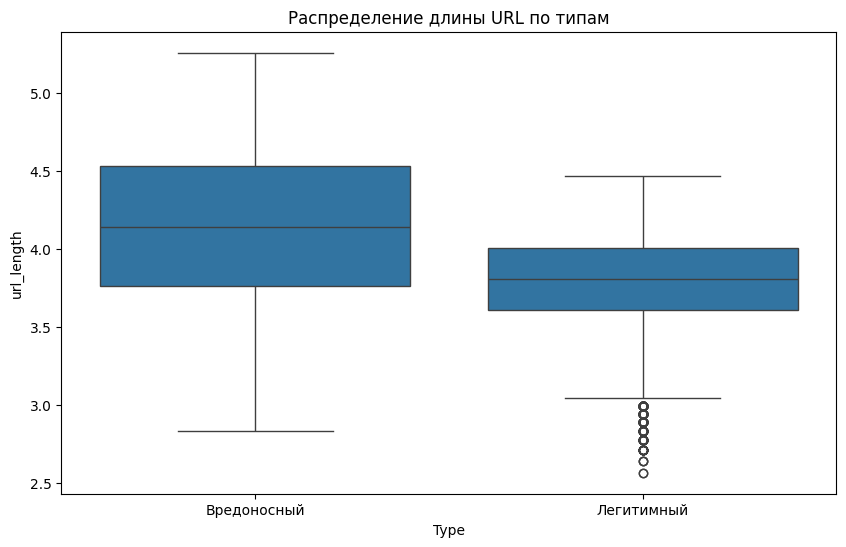

In [ ]:
# Наблюдение №1: Посмотрим распределение длины URL для разных типов.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='url_length', data=combined_data)
plt.title('Распределение длины URL по типам')
plt.xticks(['legitimate', 'phishing'], ['Легитимный', 'Вредоносный'])
plt.show()

На этом графике мы видим, что у нас медианы не на одном уровне. Это может означать, что злоумышленники часто добавляют в ссылки лишние символы (например, поддельные параметры, длинные домены). Также у фишинговых ссылок мы видим больший разброс длин (широкий ящик и длинные усы), что говорит о разнообразии методов обмана. Разница в медианах и форме распределений может быть полезным признаком для классификации.

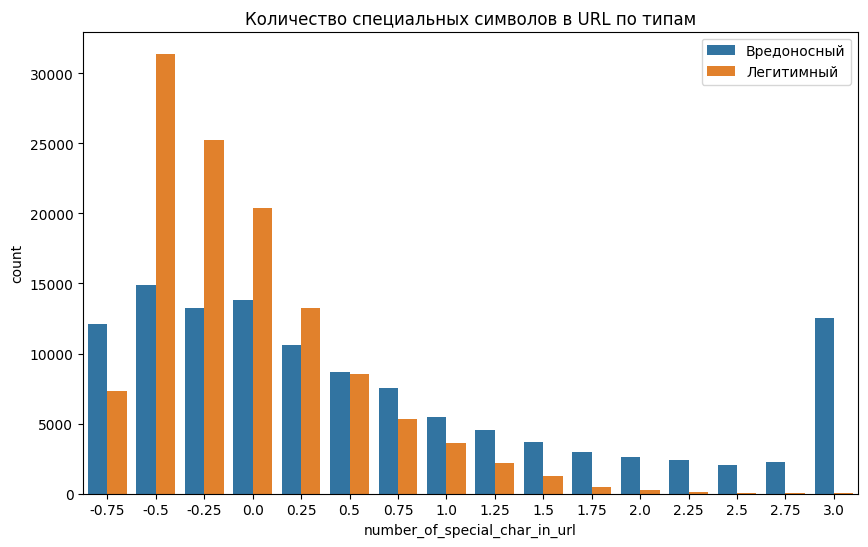

In [ ]:
# Наблюдение №2: Увидим количество специальных символов в URL
plt.figure(figsize=(10, 6))
sns.countplot(x='number_of_special_char_in_url', hue='Type', data=combined_data)
plt.title('Количество специальных символов в URL по типам')
plt.legend(['Вредоносный', 'Легитимный'])
plt.show()

Вредоносные ссылки доминируют в области высоких значений.
Мы видим, что пики для вредоносных URL смещаются вправо (больше спецсимволов), это указывает на попытки маскировки либо на кодированные символы или спам-параметры.
Так же мы видим резкий всплеск значений в районе (3.0) это указывает на определенный типовой фишинговый шаблон.

<ipython-input-34-91164d8129ce>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_data[combined_data['Type'] == 'legitimate']['entropy_of_url'], label='Легитимный', shade=True)
<ipython-input-34-91164d8129ce>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_data[combined_data['Type'] == 'phishing']['entropy_of_url'], label='Вредоносный', shade=True)


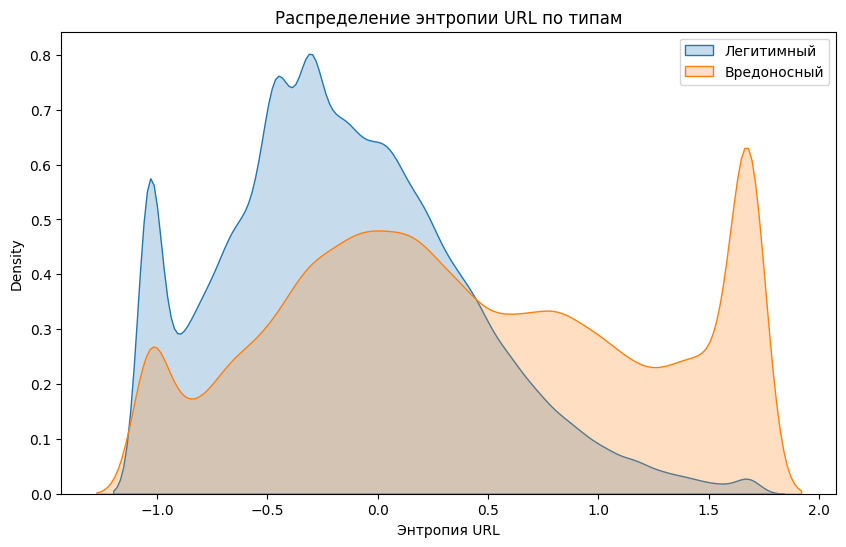

In [ ]:
# Наблюдение №3: Высокая энтропия – индикатор подозрительной ссылки.
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_data[combined_data['Type'] == 'legitimate']['entropy_of_url'], label='Легитимный', shade=True)
sns.kdeplot(combined_data[combined_data['Type'] == 'phishing']['entropy_of_url'], label='Вредоносный', shade=True)
plt.title('Распределение энтропии URL по типам')
plt.xlabel('Энтропия URL')
plt.legend()
plt.show()


На этом графике мы видим что легитимные URL имеют более низкую или среднюю энтропию (пик слева или в центре графика) так как содержат осмысленные слова (/shop, /login, example.com) а так же используют предсказуемые структуры (домены, стандартные пути).

Вредоносные URL, наоборот, смещены вправо (высокая энтропия), потому что включают случайные строки (/r4nd0m123, ?id=aBcXyZ), кодируют данные (%20%2F%3D) или добавляют шум для обхода фильтров.
Высокая энтропия – индикатор подозрительной ссылки.

У вредоносных URL мы видим на графике пик в районе больших значений – значительная часть ссылок имеет аномально высокую энтропию.
Вывод: Крайние значения энтропии почти всегда указывают на фишинг.

В фишинговых URL увеличивается значение энтропии. Большие значения - в фишинговых URL.

<ipython-input-35-d4e6219362a8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='having_digits_in_domain', y='Type', data=combined_data, ci=None)


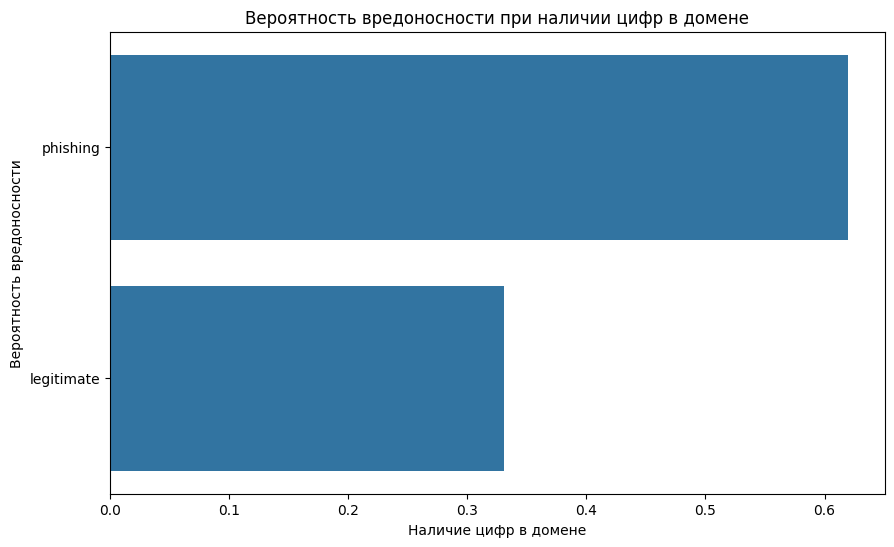

In [ ]:
# Наблюдение №4: Вероятность вредоносности при наличии цифр в домене.
plt.figure(figsize=(10, 6))
sns.barplot(x='having_digits_in_domain', y='Type', data=combined_data, ci=None)
plt.title('Вероятность вредоносности при наличии цифр в домене')
plt.ylabel('Вероятность вредоносности')
plt.xlabel('Наличие цифр в домене')
plt.show()

Из этого графика мы видим, что наличие цифр в домене у легитимных ссылок меньше чем у фишинговых. Это указывает на то, что во вредоносные ссылки, специально усложняются.

Цифры в домене – индикатор фишинга.
Фишинговые ссылки статистически чаще содержат цифры в доменной части (например, bank-verify123.com, paypal-update456.net). А легитимные сайты реже используют цифры в доменах, так как предпочитают узнаваемые названия (google.com, amazon.com).

Использования цифр во вредоносных доменах делается для обхода блокировок. Злоумышленники генерируют домены с цифрами (login-facebook-001.com), чтобы регистрировать новые URL после блокировки старых. Либо для имитации легитимных сервисов добавляют цифры, похожие на версии (netflix-support2.com).

 # Гипотеза №1. "Длина URL"

 Злоумышленники намеренно усложняют URL. Фишинговые URL имеют статистически значимое различие в длине URL по отношению к легитимным.

*   H0 - Нет статистически значимой разницы в длине  URL
между фишинговыми и легитимными ссылками.
*   H1 - Фишинговые URL имеют отличие в длине по отношению к легитимным.

In [ ]:
# Создаем копию данных, чтобы не изменять оригинал
fich_plot = fich.copy()
fich_plot['Type'] = fich_plot['Type'].map({1: 'phishing', 0: 'legitimate'})

# Разделяем данные
phishing = fich_plot[fich_plot['Type'] == 'phishing']
legitimate = fich_plot[fich_plot['Type'] == 'legitimate']

# Сделаем равное количество данных для двух выборок.
phishing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119409 entries, 1 to 247948
Data columns (total 44 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       119409 non-null  object 
 1   url_length                                 119409 non-null  float64
 2   number_of_dots_in_url                      119409 non-null  float64
 3   number_of_digits_in_url                    119409 non-null  float64
 4   number_of_special_char_in_url              119409 non-null  float64
 5   number_of_hyphens_in_url                   119409 non-null  int64  
 6   number_of_underline_in_url                 119409 non-null  float64
 7   number_of_slash_in_url                     119409 non-null  float64
 8   number_of_equal_in_url                     119409 non-null  float64
 9   number_of_at_in_url                        119409 non-null  int64  
 10  number_of_dol

In [ ]:
legitimate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128541 entries, 0 to 247949
Data columns (total 44 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       128541 non-null  object 
 1   url_length                                 128541 non-null  float64
 2   number_of_dots_in_url                      128541 non-null  float64
 3   number_of_digits_in_url                    128541 non-null  float64
 4   number_of_special_char_in_url              128541 non-null  float64
 5   number_of_hyphens_in_url                   128541 non-null  int64  
 6   number_of_underline_in_url                 128541 non-null  float64
 7   number_of_slash_in_url                     128541 non-null  float64
 8   number_of_equal_in_url                     128541 non-null  float64
 9   number_of_at_in_url                        128541 non-null  int64  
 10  number_of_dol

In [ ]:
legitimate_1 = legitimate.head(119409)
legitimate_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119409 entries, 0 to 230318
Data columns (total 44 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       119409 non-null  object 
 1   url_length                                 119409 non-null  float64
 2   number_of_dots_in_url                      119409 non-null  float64
 3   number_of_digits_in_url                    119409 non-null  float64
 4   number_of_special_char_in_url              119409 non-null  float64
 5   number_of_hyphens_in_url                   119409 non-null  int64  
 6   number_of_underline_in_url                 119409 non-null  float64
 7   number_of_slash_in_url                     119409 non-null  float64
 8   number_of_equal_in_url                     119409 non-null  float64
 9   number_of_at_in_url                        119409 non-null  int64  
 10  number_of_dol

Посмотрим распределения, для выбора метода сравнения.

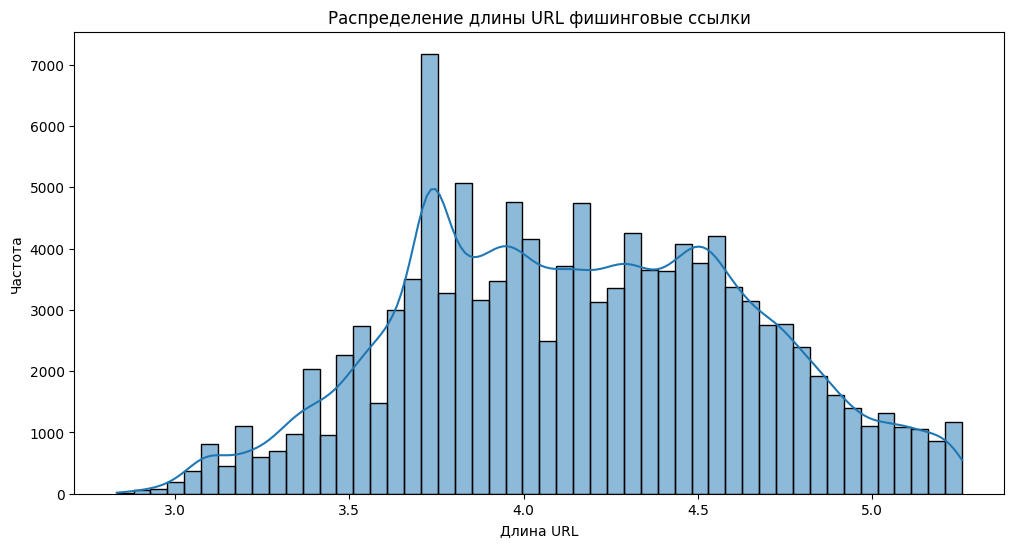

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=phishing, x='url_length', bins=50, kde=True)
plt.title('Распределение длины URL фишинговые ссылки')
plt.xlabel('Длина URL')
plt.ylabel('Частота')
plt.show()

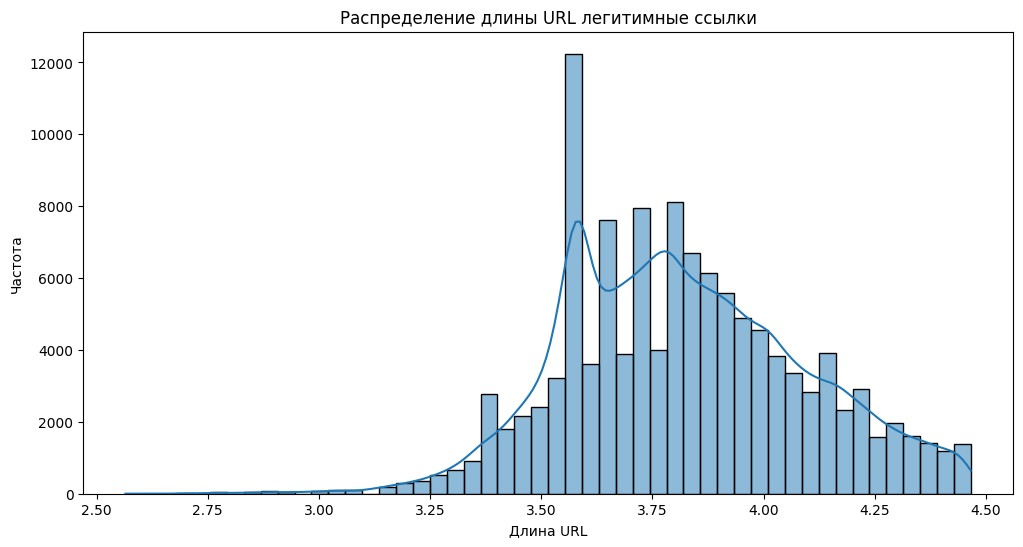

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=legitimate_1, x='url_length', bins=50, kde=True)
plt.title('Распределение длины URL легитимные ссылки')
plt.xlabel('Длина URL')
plt.ylabel('Частота')
plt.show()

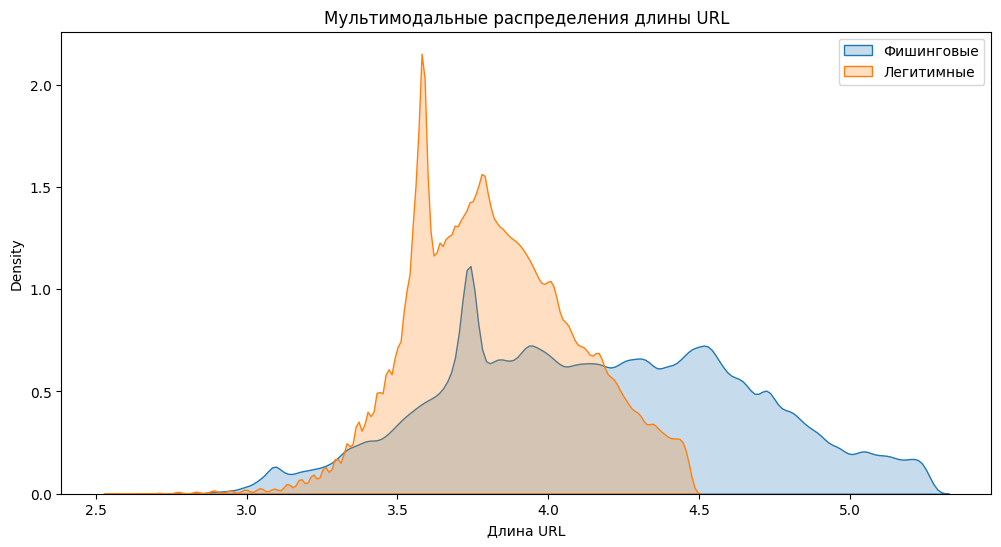

In [ ]:
# Ядерные оценки плотности (KDE)
plt.figure(figsize=(12, 6))
sns.kdeplot(phishing['url_length'], label='Фишинговые', fill=True, bw_adjust=0.5)
sns.kdeplot(legitimate_1['url_length'], label='Легитимные', fill=True, bw_adjust=0.5)
plt.title('Мультимодальные распределения длины URL')
plt.xlabel('Длина URL')
plt.legend()
plt.show()

Из этих графиков мы видим, что данные имеют несколько пиков в распределении.

In [ ]:
# Основные статистики для фишинговых ссылок.
phishing['url_length'].describe()

,url_length
count,119409.000000
mean,4.161386
std,0.492114
min,2.833213
25%,3.761200
50%,4.143135
75%,4.532599
max,5.257495


In [ ]:
# Дополнительные статистики
print(f"\nМедиана: {phishing['url_length'].median()}")
print(f"Стандартное отклонение: {phishing['url_length'].std()}")
print(f"Эксцесс: {phishing['url_length'].kurtosis():.2f}")
print(f"Асимметрия: {phishing['url_length'].skew():.2f}")


Медиана: 4.143134726391533
Стандартное отклонение: 0.49211445352168715
Эксцесс: -0.65
Асимметрия: 0.04


In [ ]:
# Основные статистики для легитимных ссылок.
legitimate_1['url_length'].describe()

,url_length
count,119409.000000
mean,3.818714
std,0.271523
min,2.564949
25%,3.610918
50%,3.806662
75%,4.007333
max,4.465908


In [ ]:
# Дополнительные статистики
print(f"\nМедиана: {legitimate_1['url_length'].median()}")
print(f"Стандартное отклонение: {legitimate_1['url_length'].std()}")
print(f"Эксцесс: {legitimate_1['url_length'].kurtosis():.2f}")
print(f"Асимметрия: {legitimate_1['url_length'].skew():.2f}")


Медиана: 3.8066624897703196
Стандартное отклонение: 0.27152301667892786
Эксцесс: -0.18
Асимметрия: 0.13


В нашем случае т-тест может дать неверные результаты: на графиках присутствует несколько пиков. Это говорит о мультимодальности данных.

In [ ]:
# В связи с тем, что данные имеют несколько пиков в распределении предлагаю тест Колмогорова-Смирнова (K-S). Который сравнивает всю форму распределения, а не только средние/ранги.
ks_stat, p_value = stats.ks_2samp(phishing['url_length'], legitimate_1['url_length'])
print(f"KS-статистика: {ks_stat:.4f}, p-значение: {p_value:.4f}")

KS-статистика: 0.3691, p-значение: 0.0000


Вывод: Фишинговые длины URL имеют статистически значимое различие по отношению к легитимным.

ВЫВОД.
Исходя из визуального анализа графиков и теста Колмогорова-Смирнова
*   Длины URL: KS-статистика: 0.3691, p-значение: 0.0000

 Мы можем  подтвердить гипотезу о том, что фишинговые ссылки имеют статистически значимое отличие в длинах URL.


 Исходя из наблюдения №1 и вывода гипотезы №1 можно предположить, злоумышленники действительно усложняют фишинговые ссылки.

# Гипотеза №2. "Энтропия в фишинговых и легитимных ссылках"

Высокая энтропия URL чаще встречается в фишинговых ссылках.
Энтропия в фишинговых URL имеет статистически значимое отличие по отношению к легитимным ссылкам.

*   H0 - Энтропия URL фишинговых и легитимных URL одинакова.
*   H1 - Энтропия URL фишинговых и легитимных URL имеет отличие.

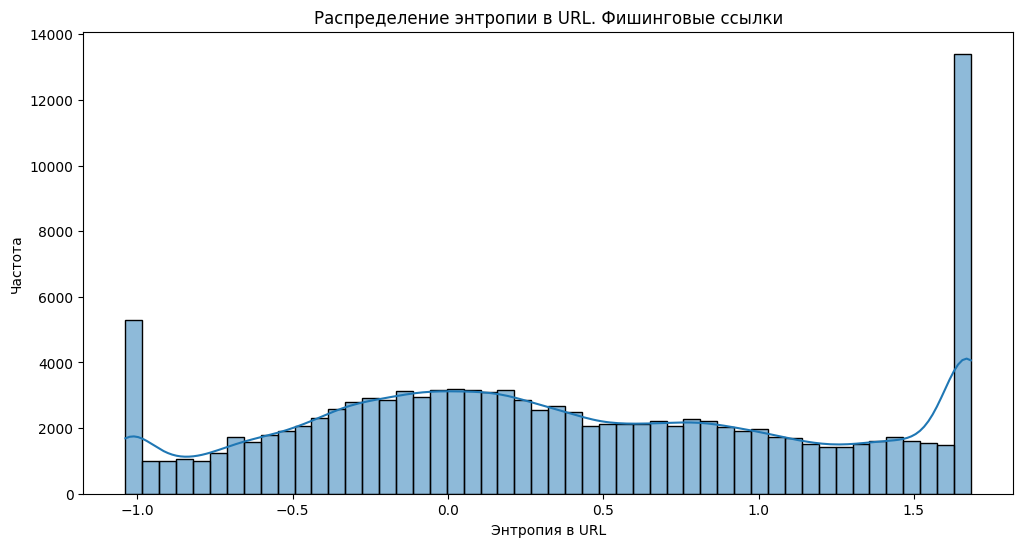

In [ ]:
# Посмотрим на распределения энтропии в URL для фишинговых и легитимных ссылок, для выбора метода.
# Фишинговые ссылки.
plt.figure(figsize=(12, 6))
sns.histplot(data=phishing, x='entropy_of_url', bins=50, kde=True)
plt.title('Распределение энтропии в URL. Фишинговые ссылки')
plt.xlabel('Энтропия в URL')
plt.ylabel('Частота')
plt.show()

In [ ]:
# Основные статистики
phishing['entropy_of_url'].describe()

,entropy_of_url
count,119409.000000
mean,0.394635
std,0.810178
min,-1.038867
25%,-0.230807
50%,0.307297
75%,1.057005
max,1.683875


In [ ]:
# Дополнительные статистики
print(f"\nМедиана: {phishing['entropy_of_url'].median()}")
print(f"Стандартное отклонение: {phishing['entropy_of_url'].std()}")
print(f"Эксцесс: {phishing['entropy_of_url'].kurtosis():.2f}")
print(f"Асимметрия: {phishing['entropy_of_url'].skew():.2f}")


Медиана: 0.3072969323845104
Стандартное отклонение: 0.8101775286559165
Эксцесс: -1.05
Асимметрия: 0.09


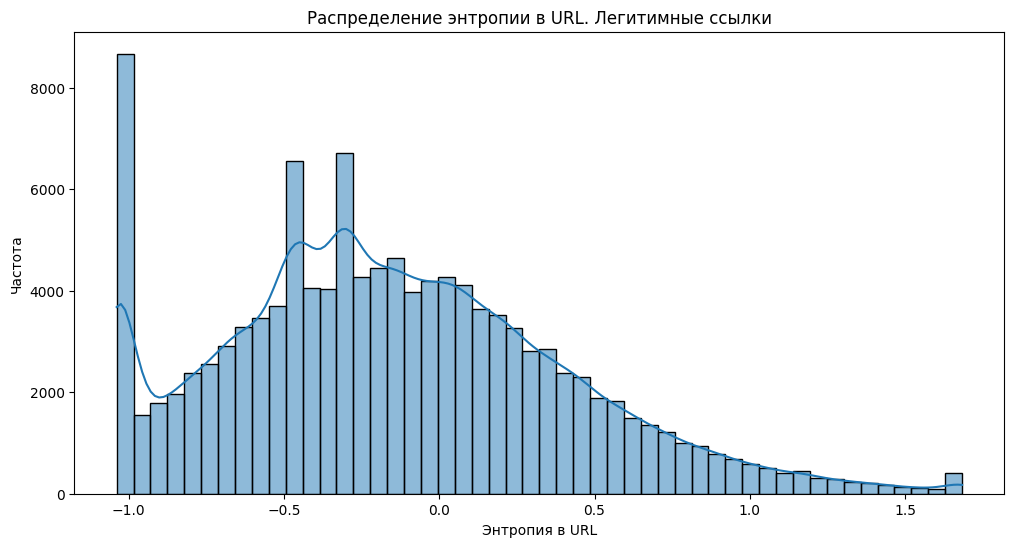

In [ ]:
# Легитимные ссылки.
plt.figure(figsize=(12, 6))
sns.histplot(data=legitimate_1, x='entropy_of_url', bins=50, kde=True)
plt.title('Распределение энтропии в URL. Легитимные ссылки')
plt.xlabel('Энтропия в URL')
plt.ylabel('Частота')
plt.show()

In [ ]:
# Основные статистики
legitimate_1['entropy_of_url'].describe()

,entropy_of_url
count,119409.000000
mean,-0.151015
std,0.549041
min,-1.038867
25%,-0.526921
50%,-0.201262
75%,0.195572
max,1.683875


In [ ]:
# Дополнительные статистики
print(f"\nМедиана: {legitimate_1['entropy_of_url'].median()}")
print(f"Стандартное отклонение: {legitimate_1['entropy_of_url'].std()}")
print(f"Эксцесс: {legitimate_1['entropy_of_url'].kurtosis():.2f}")
print(f"Асимметрия: {legitimate_1['entropy_of_url'].skew():.2f}")


Медиана: -0.2012616148875129
Стандартное отклонение: 0.5490406365714594
Эксцесс: 0.06
Асимметрия: 0.49


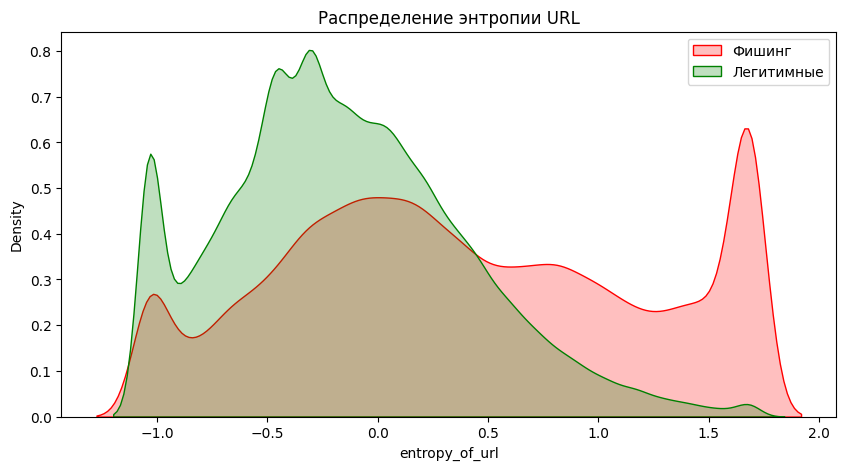

In [ ]:
#  Построим график плотности для визуализации распределений.
plt.figure(figsize=(10, 5))
sns.kdeplot(phishing['entropy_of_url'], label='Фишинг', color='red', fill=True)
sns.kdeplot(legitimate_1['entropy_of_url'], label='Легитимные', color='green', fill=True)
plt.title('Распределение энтропии URL')
plt.legend()
plt.show()

Из этого графика мы можем сделать два наблюдения:


*   Мы визуально видим, что выборки у нас отличны.
*   Данные двух выборок имеют ненормальное распределение. Поэтому предлагаю проверить гипотезу с помощью U-теста Манна-Уитни.


In [ ]:
#Проведем U-тест.
phishing_entropy = phishing['entropy_of_url']
legitimate_entropy = legitimate_1['entropy_of_url']

u_stat, p_value = stats.mannwhitneyu(phishing_entropy, legitimate_entropy, alternative='two-sided')

print(f"U-статистика: {u_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Отвергаем H0: энтропия URL статистически значимо различается.")
else:
    print("Не отвергаем H0: различий в энтропии нет.")

U-статистика: 9938285460.5, p-value: 0.0
Отвергаем H0: энтропия URL статистически значимо различается.


Выводы: U-статистика: 9938285460.5, p-значение: 0.0000 мы имеем статистически значимую разницу между двумя выборками. А значит можем подтвердить гипотезу Н1.

На основании проведенного теста, визуализации и полученных статистических данных мы можем сделать вывод, что разница в выборках имеет статически значимую разницу и мы можем подтвердить альтернативную гипотезу. Энтропия в фишинговых ссылках и легитимных действительно отличается.

# Гипотеза №3. "Количество специальных символов"

Есть разница между количеством спецсимволов у фишинговых  URL и легитимных URL.

*   Н0: Количество специальных символов в URL не отличается между фишинговыми и легитимными ссылками.
*   Н1: Фишинговые URL содержат статистически значимое отличие в количестве специальных символов по сравнению с легитимными URL.


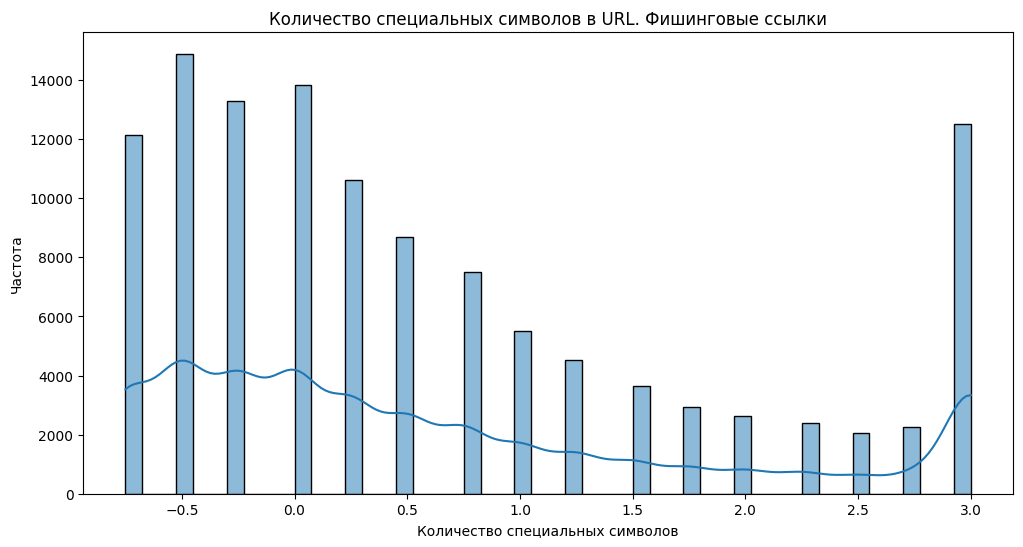

In [ ]:
# Посмотрим на распределения в данных о количестве спец.символов в URL фишинговых и легитимных ссылок.
# Фишинговые ссылки.
plt.figure(figsize=(12, 6))
sns.histplot(data=phishing, x='number_of_special_char_in_url', bins=50, kde=True)
plt.title('Количество специальных символов в URL. Фишинговые ссылки')
plt.xlabel('Количество специальных символов')
plt.ylabel('Частота')
plt.show()

In [ ]:
# Основные статистики
phishing['number_of_special_char_in_url'].describe()

,number_of_special_char_in_url
count,119409.000000
mean,0.620508
std,1.184249
min,-0.750000
25%,-0.250000
50%,0.250000
75%,1.250000
max,3.000000


In [ ]:
# Дополнительные статистики
print(f"\nМедиана: {phishing['number_of_special_char_in_url'].median()}")
print(f"Стандартное отклонение: {phishing['number_of_special_char_in_url'].std()}")
print(f"Эксцесс: {phishing['number_of_special_char_in_url'].kurtosis():.2f}")
print(f"Асимметрия: {phishing['number_of_special_char_in_url'].skew():.2f}")


Медиана: 0.25
Стандартное отклонение: 1.1842494272900588
Эксцесс: -0.52
Асимметрия: 0.83


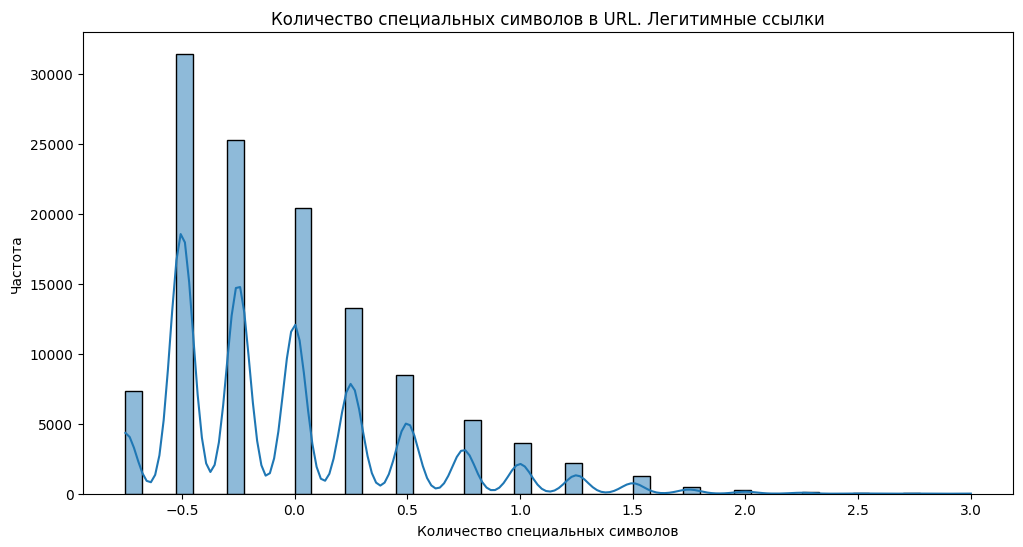

In [ ]:
# Легитимные ссылки.
plt.figure(figsize=(12, 6))
sns.histplot(data=legitimate_1, x='number_of_special_char_in_url', bins=50, kde=True)
plt.title('Количество специальных символов в URL. Легитимные ссылки')
plt.xlabel('Количество специальных символов')
plt.ylabel('Частота')
plt.show()

In [ ]:
# Основные статистики
legitimate_1['number_of_special_char_in_url'].describe()

,number_of_special_char_in_url
count,119409.000000
mean,-0.049676
std,0.522760
min,-0.750000
25%,-0.500000
50%,-0.250000
75%,0.250000
max,3.000000


In [ ]:
# Дополнительные статистики
print(f"\nМедиана: {legitimate_1['number_of_special_char_in_url'].median()}")
print(f"Стандартное отклонение: {legitimate_1['number_of_special_char_in_url'].std()}")
print(f"Эксцесс: {legitimate_1['number_of_special_char_in_url'].kurtosis():.2f}")
print(f"Асимметрия: {legitimate_1['number_of_special_char_in_url'].skew():.2f}")


Медиана: -0.25
Стандартное отклонение: 0.5227595268625316
Эксцесс: 1.54
Асимметрия: 1.19


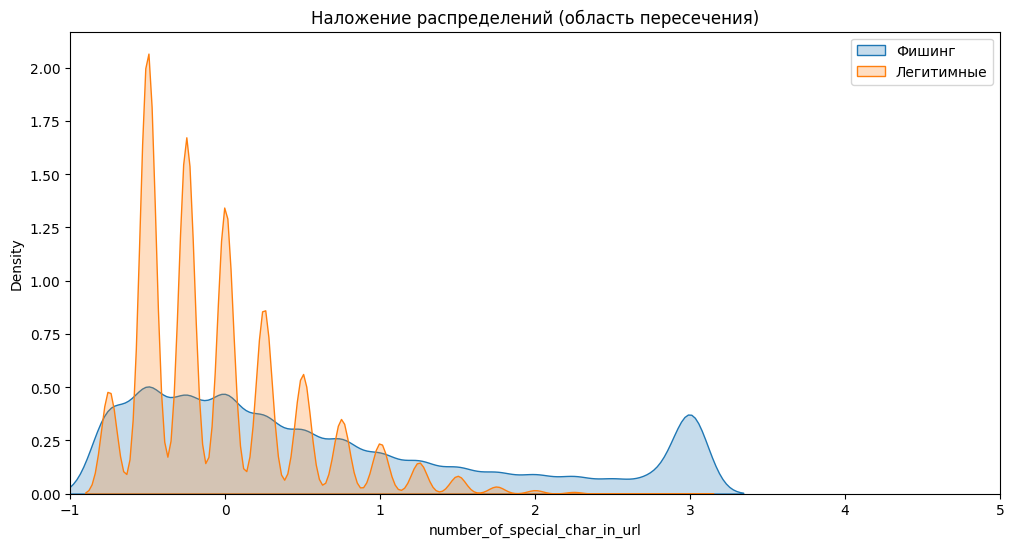

In [ ]:
# Визуальное представление распределений.
plt.figure(figsize=(12, 6))
sns.kdeplot(phishing['number_of_special_char_in_url'], label='Фишинг', fill=True)
sns.kdeplot(legitimate_1['number_of_special_char_in_url'], label='Легитимные', fill=True)
plt.xlim(-1, 5)  # Ограничиваем диапазон для наглядности
plt.title('Наложение распределений (область пересечения)')
plt.legend()
plt.show()

Если наложить графики друг на друга и ограничить диапазон для наглядности, мы визуально видим, что данные имеют ненормальное распределение. К тому же выборки отличны.

Для того чтобы проверить есть ли статистически значимое отличие, предлагаю провести тест Манна-Уитни (основной) и тест Колмогорова-Смирнова (как дополнительную проверку).

In [ ]:
#Проведем U-тест.
phishing_special_char = phishing['number_of_special_char_in_url']
legitimate_special_char = legitimate_1['number_of_special_char_in_url']

u_stat, p_value = stats.mannwhitneyu(phishing_special_char, legitimate_special_char, alternative='two-sided')

print(f"U-статистика: {u_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Отвергаем H0: количество спецсимволов в URL статистически значимо различается.")
else:
    print("Не отвергаем H0: различий в количестве спецсимволов нет.")

U-статистика: 9298689231.0, p-value: 0.0
Отвергаем H0: количество спецсимволов в URL статистически значимо различается.


In [ ]:
# Проведем тест Колмогорова-Смирнова.
ks_stat, p_value = stats.ks_2samp(phishing['number_of_special_char_in_url'], legitimate_1['number_of_special_char_in_url'])
print(f"KS-статистика: {ks_stat:.4f}, p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем H0: количество спецсимволов в URL статистически значимо различается.")
else:
    print("Не отвергаем H0: различий в количестве спецсимволов нет.")

KS-статистика: 0.2753, p-значение: 0.0000
Отвергаем H0: количество спецсимволов в URL статистически значимо различается.


Выводы:

*   Визуально видно, что распределения отличаются друг от друга
*   Это подтверждает и U-тест Манна-Уитни: U-статистика: 9298689231.0, p-value: 0.0
*   Тест Колмогорова-Смирнова 0.2753, p-значение: 0.0000 тоже показывает, что есть статистически значимая разница между количеством спецсимволов у фишинговых и легитимных ссылок.

Опираясь на выводы выше мы можем подтвердить альтернативную гипотезу:  количество спецсимволов в URL у фишинговых и легитимных ссылок различны.

Исходя из проведенных проверок гипотез можно сделать вывод, что фишинговые URL статистически значимо отличаются от легитимных по длине, энтропии и количеству спецсимволов, что делает эти признаки надежными маркерами для автоматического детектирования. Однако для максимальной эффективности их следует применять в сочетании с другими методами.
Так же важно следить за динамикой угроз: злоумышленники могут адаптироваться, сокращая длину URL или избегая спецсимволов.

Некоторые легитимные сервисы могут иметь схожие характеристики. Поэтому рекомендуется дополнять анализ другими признаками.


# Поиск коррелирующих друг с другом признаков. Матрица корреляций.

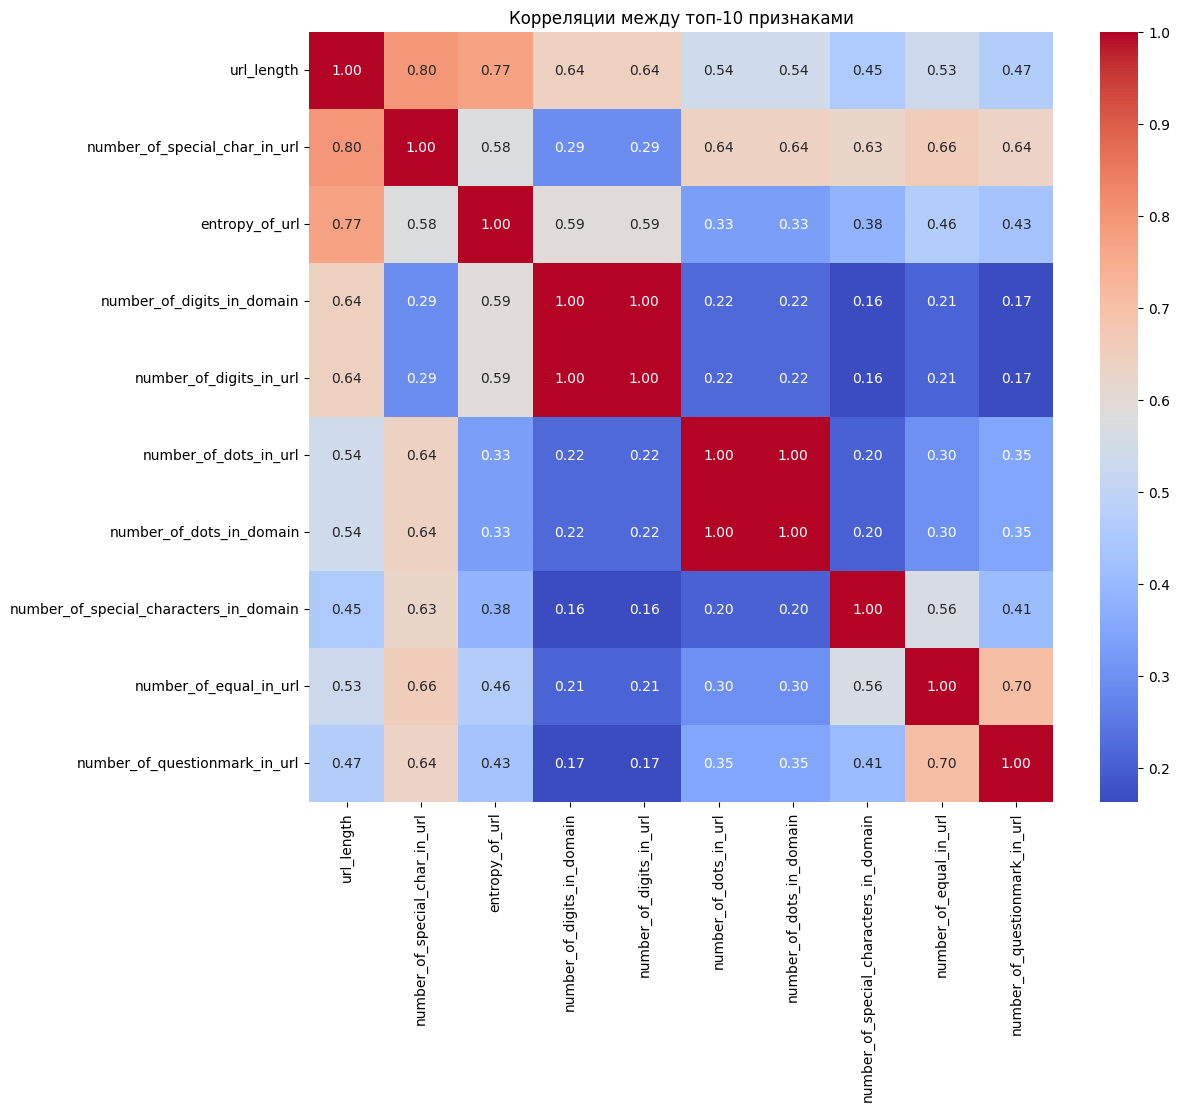

In [ ]:
# В силу того, что у нас 44 признака, то есть очень много, предлагаю построить матрицу корреляции для ТОП 10 признаков.
# Создаем DataFrame только с числовыми признаками
numeric_data = fich_copy.select_dtypes(include=[np.number])

# Удаляем целевую переменную, если она была закодирована
if 'Type' in numeric_data.columns:
    numeric_data = numeric_data.drop('Type', axis=1)

# Вычисляем матрицу корреляций
corr_matrix = numeric_data.corr()

# Визуализируем корреляции между топ-10 признаками
top_features = corr_matrix.abs().sum().sort_values(ascending=False).head(10).index
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляции между топ-10 признаками')
plt.show()

 Из построеной матрицы корреляций мы видим что следующие признаки имеют сильную корреляцию:


*   url_length - number_of_special_char_in_url - 0.80 (длина URL -количество специальных символов в url)
*   url_length - entropy_of_url - 0.77 (длина URL - энтропия url)
*   number_of_equal_in_url - number_of_questionmark_in_url - 0.70 (количество равно в url - количество вопросительных знаков в url)

А так же мы видим, что вот эти признаки имеют умеренную, но достаточно сильную корреляцию:

*   number_of_digits_in_url - url_length - 0,64 (количество цифр в url - длина URL)
*   number_of_digits_in_domain - url_length - 0,64 (количество цифр в домене - длина URL)
*   number_of_special_char_in_url - number_of_equal_in_url - 0,66 (количество специальных символов в url -количество равно в url)
*   number_of_special_char_in_url - number_of_dots_in_domain - 0.64 (количество специальных символов в url - количество точек в домене)
*   number_of_special_char_in_url - number_of_dots_in_url - 0.64 (количество специальных символов в url - количество точек в url)
*   number_of_special_char_in_url - number_of_special_characters_in_domain - 0.63 (количество специальных символов в url - количество специальных символов в домене)

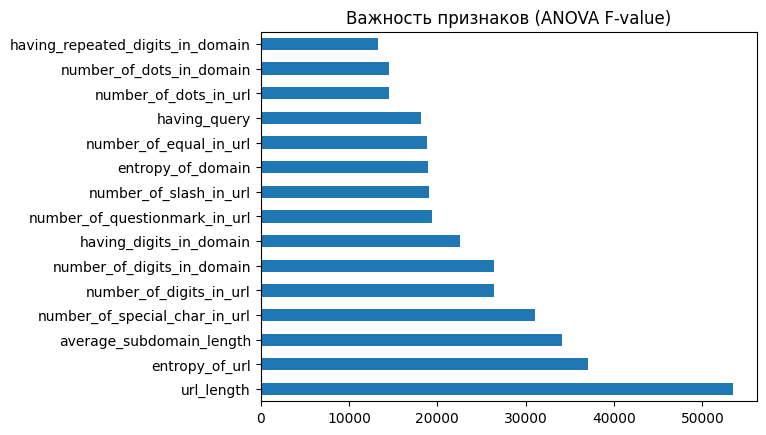

In [ ]:
# Визуализируем важные признаки для наглядности.
feature_importances = pd.Series(selector.scores_, index=X.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.title('Важность признаков (ANOVA F-value)')
plt.show()

Этот график дополняет матрицу корреляций, еще раз подтверждая значимость признаков. На нем мы видим, что признаки длина URL, энтропия URL, количество специальных символов являются одними из самых важных.

Мы наблюдаем высокую корреляцию (0.80) между длиной URL и количеством спецсимволов.

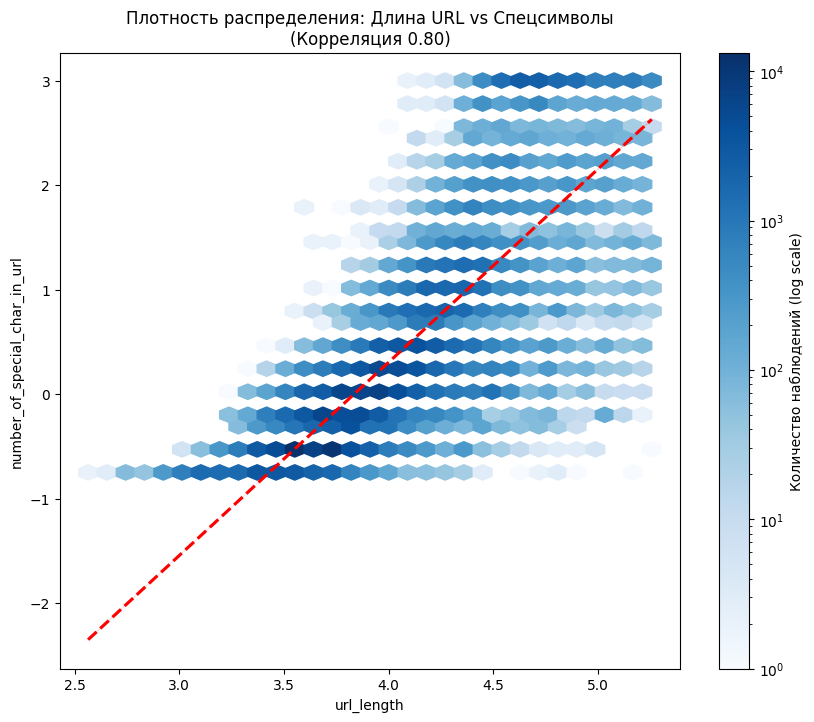

In [ ]:
# Чтобы посмотреть распределение для двух признаков имеющих сильнейшую корреляцию построим вот такую интересную
# гексагональную бининг-диаграмму для плотности точек. Гексагоны показывают плотность распределения точек (логарифмическая шкала).
# Области с более темным цветом = больше наблюдений.
# Красная пунктирная линия - линейная регрессия для ориентации.

plt.figure(figsize=(10, 8))
plt.hexbin(fich['url_length'], fich['number_of_special_char_in_url'],
           gridsize=30, cmap='Blues', bins='log')
plt.colorbar(label='Количество наблюдений (log scale)')
plt.title("Плотность распределения: Длина URL vs Спецсимволы\n(Корреляция 0.80)")
plt.xlabel("Длина URL")
plt.ylabel("Количество спецсимволов")

# Добавляем линию регрессии для ориентации:
sns.regplot(x='url_length', y='number_of_special_char_in_url', data=fich,
            scatter=False, color='red', line_kws={'linestyle':'--'})

plt.show()

Высокая корреляция (0.80) между длиной URL и количеством спецсимволов означает, что чем длиннее ссылка, тем больше в ней спецсимволов. Это логично, так как длинные URL обычно содержат параметры запроса, пути с множеством, кодированные символы (%20, %3F).
Если URL длинный и содержит много спецсимволов – высокая вероятность фишинга. Рекомендация: считать длину URL, если она больше 100 символов и спецсимволов больше 10, то метить как фишинг.

Наблюдается положительная, сильная корреляция между длиной URL и его энтропией. Построим двойную диаграмму рассеяния с регрессией для этих признаков.

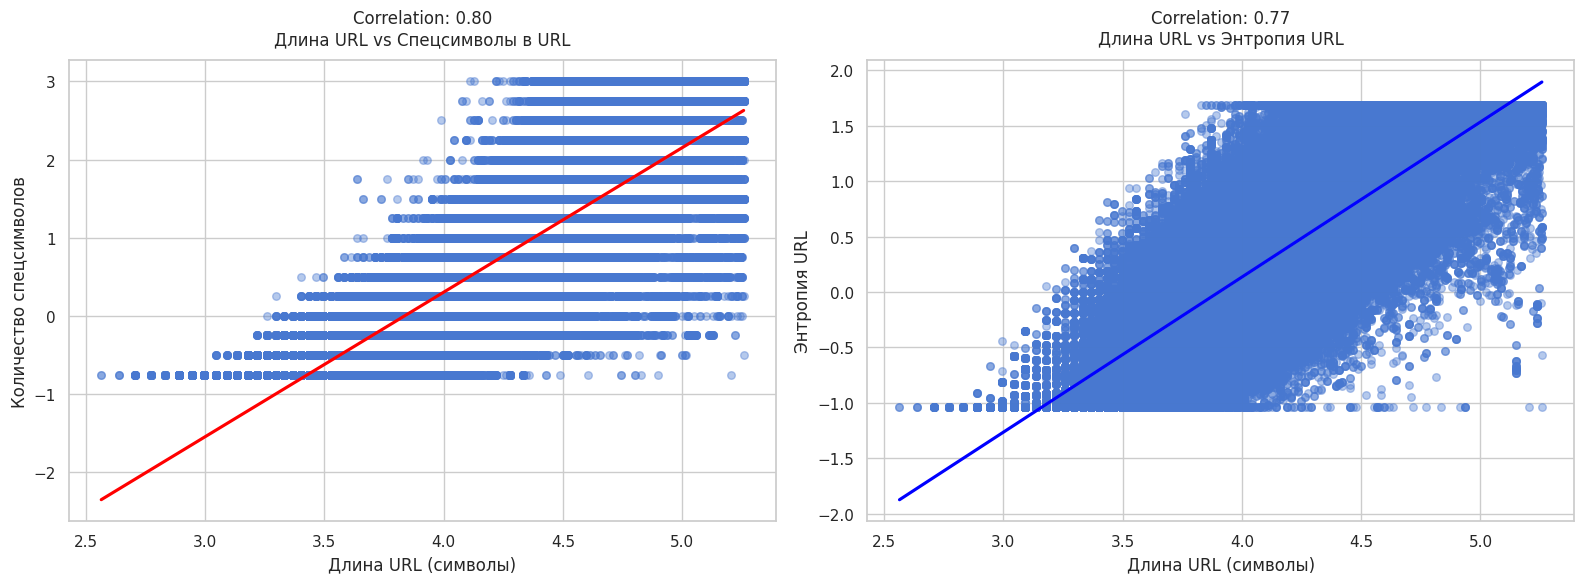

In [ ]:
# Построим двойную диаграмму рассеяния с регрессией.
# Регрессионные линии показывают направление и силу связи.
# Плотность точек вдоль линии регрессии подтверждает высокую корреляцию, а разный цвет для разных пар признаков улучшает читаемость.

# Настраиваем стиль
sns.set(style="whitegrid", palette="muted")

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Первая корреляция: url_length vs number_of_special_char_in_url
sns.regplot(x='url_length', y='number_of_special_char_in_url', data=fich,
            scatter_kws={'alpha':0.4, 's':30}, line_kws={'color':'red'}, ax=ax1)
ax1.set_title(f"Correlation: 0.80\nДлина URL vs Спецсимволы в URL", pad=12)
ax1.set_xlabel("Длина URL (символы)")
ax1.set_ylabel("Количество спецсимволов")

# Вторая корреляция: url_length vs entropy_of_url
sns.regplot(x='url_length', y='entropy_of_url', data=fich,
            scatter_kws={'alpha':0.4, 's':30}, line_kws={'color':'blue'}, ax=ax2)
ax2.set_title(f"Correlation: 0.77\nДлина URL vs Энтропия URL", pad=12)
ax2.set_xlabel("Длина URL (символы)")
ax2.set_ylabel("Энтропия URL")

plt.tight_layout()
plt.show()

Наблюдается положительная корреляция между длиной URL и его энтропией. Чем длиннее URL, тем выше его энтропия (больше случайности или сложности в символах). Фишинговые URL сгруппированы в правой верхней части графика (длинные URL + высокая энтропия). Легитимные URL концентрируются ближе к началу координат (короткие URL, низкая энтропия). Такая же ситуация наблюдается для соотношения длина URL и количества спецсимволов.

Общие выводы:
На основе анализа матрицы корреляций, выводов наблюдений и проверки гипотез можно сделать вывод, что такие характеристики, как длина URL, энтропия URL и количество специальных символов, играют значительную роль в детектировании фишинговых атак.

*   Длина URL
Фишинговые ссылки часто имеют необычно длинные URL, так как злоумышленники могут добавлять множество поддоменов, параметров или случайных символов, чтобы замаскировать вредоносный адрес или обойти простые фильтры. Легитимные сайты, как правило, используют более короткие и читаемые URL. Таким образом, длина URL может служить индикатором подозрительности.

*   Энтропия URL
Энтропия (мера хаотичности символов в строке) помогает выявить случайно сгенерированные или зашифрованные части URL, которые часто встречаются в фишинговых ссылках. Например, злоумышленники могут добавлять случайные последовательности символов, чтобы избежать блокировки. Высокая энтропия может указывать на искусственно созданный URL, что характерно для мошеннических сайтов.

*   Количество специальных символов
Фишинговые ссылки нередко содержат необычно большое количество специальных символов (например, %, @, ?, =, &), которые используются для маскировки настоящего домена, добавления множества параметров в запрос, использования кодированных символов (например, %20 вместо пробела) для усложнения анализа.

Признаки длины URL, энтропии и количества специальных символов являются важными для классификации фишинговых атак, так как они отражают ключевые различия между легитимными и мошенническими ссылками. Их включение в модель машинного обучения может значительно повысить точность детектирования. Таким образом, комбинация этих признаков с дополнительными метриками позволит создать более надежную систему обнаружения фишинга.

# **III. Построение моделей машинного обучения. Сравнение моделей, выбор оптимальной.**

Первым этапом сделаем разделение на признаки и целевую переменную и на обучающую и тестовую выборки. В дальнейшем для сравнения моделей мы будем использовать это же разделение.



*   Целевая переменная: Type: 0 - Легитимные ссылки, 1 - Фишинговые ссылки.
*   Признаки: url_length, number_of_dots_in_url, number_of_digits_in_url, number_of_special_char_in_url, number_of_hyphens_in_url, number_of_underline_in_url, number_of_slash_in_url, number_of_equal_in_url, number_of_at_in_url, number_of_dollar_in_url, number_of_exclamation_in_url , number_of_hashtag_in_url, number_of_percent_in_url, domain_length, number_of_dots_in_domain, number_of_hyphens_in_domain, having_special_characters_in_domain, number_of_special_characters_in_domain, having_digits_in_domain, number_of_digits_in_domain, having_repeated_digits_in_domain, number_of_subdomains, having_dot_in_subdomain, having_hyphen_in_subdomain, average_subdomain_length, verage_number_of_dots_in_subdomain, average_number_of_hyphens_in_subdomain, having_special_characters_in_subdomain, number_of_special_characters_in_subdomain, having_digits_in_subdomain, number_of_digits_in_subdomain, having_repeated_digits_in_subdomain, having_path, path_length, having_query, having_fragment, having_anchor, entropy_of_url, entropy_of_domain, slash_normalized, has_equal, has_question, digits_normalized
*   Параметры для обучающей и тестовой выборки: test size - 0.2, random state - 42




**МОДЕЛЬ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ.**

Построим модель логистической регрессии. Обоснованием такого выбора будет простая интерпретируемость.

Эта модель хорошо работает, если признаки линейно разделимы.

In [ ]:
# Загружаем признаки в переменную X, а целевую переменную ''Type' в переменную y.
# Разделение на признаки и целевую переменную.
fich_copy = fich.copy(deep=True)
X = fich_copy.drop('Type', axis=1)
y = fich_copy['Type']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247950 entries, 0 to 247949
Data columns (total 43 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   url_length                                 247950 non-null  float64
 1   number_of_dots_in_url                      247950 non-null  float64
 2   number_of_digits_in_url                    247950 non-null  float64
 3   number_of_special_char_in_url              247950 non-null  float64
 4   number_of_hyphens_in_url                   247950 non-null  int64  
 5   number_of_underline_in_url                 247950 non-null  float64
 6   number_of_slash_in_url                     247950 non-null  float64
 7   number_of_equal_in_url                     247950 non-null  float64
 8   number_of_at_in_url                        247950 non-null  int64  
 9   number_of_dollar_in_url                    247950 non-null  int64  
 10  number_o

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Создание и обучение модели
logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Предсказания на тестовой выборке
y_test_pred = logreg.predict(X_test_scaled)

In [ ]:
# Предсказания на тренировочной выборке (для оценки переобучения)
y_train_pred = logreg.predict(X_train_scaled)

In [ ]:
# Оценка accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Логистическая регрессия:")
print(f"Accuracy на тренировочной выборке: {train_accuracy:.4f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")

Логистическая регрессия:
Accuracy на тренировочной выборке: 0.7898
Accuracy на тестовой выборке: 0.7890


Выводы:

Точность на тренировочных (0.7898) и тестовых (0.7890) данных практически идентична (разница всего 0.0008). Это означает, что модель не переобучается и хорошо обобщает новые данные.

Качество модели
Accuracy около 78.9% – это приемлемо, но не идеально.

In [ ]:
# Матрица ошибок для тренировочных данных
print("Матрица ошибок (Train):")
print(confusion_matrix(y_train, y_train_pred))

Матрица ошибок (Train):
[[88669 14204]
 [27498 67989]]


In [ ]:
# Отчет классификации для тренировочных данных
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.76      0.86      0.81    102873
           1       0.83      0.71      0.77     95487

    accuracy                           0.79    198360
   macro avg       0.80      0.79      0.79    198360
weighted avg       0.79      0.79      0.79    198360



In [ ]:
# Матрица ошибок для тестовых данных
print("\nМатрица ошибок (Test):")
print(confusion_matrix(y_test, y_test_pred))


Матрица ошибок (Test):
[[22102  3566]
 [ 6897 17025]]


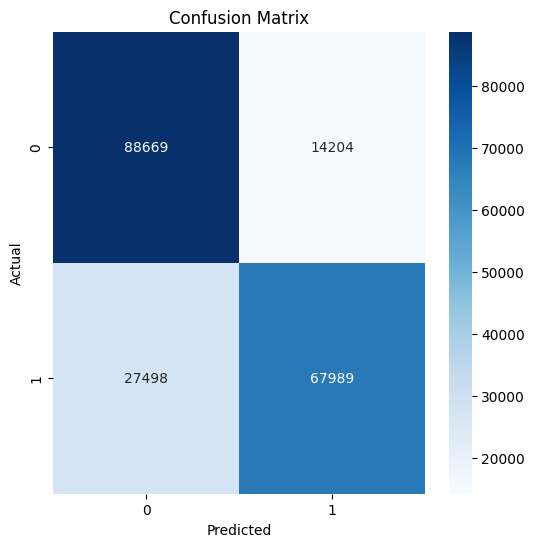

In [ ]:
# Матрица ошибок, визуализация для тренировочных данных.
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

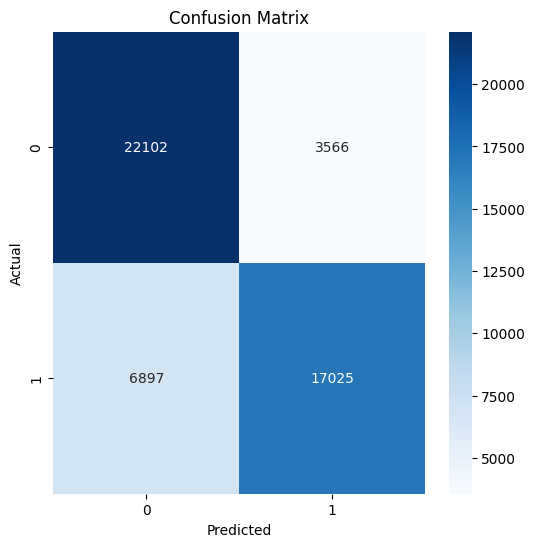

In [ ]:
# Матрица ошибок, визуализация для тестовых данных.
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Анализ матриц ошибок и отчета классификации для Логистической регрессии.

Тренировочные данные (Train)
Матрица ошибок:

*   True Negative (TN): 88,669 (верно классифицированные легитимные URL)
*   False Positive (FP): 14,204 (ложные блокировки)
*   False Negative (FN): 27,498 (пропущенные угрозы)
*   True Positive (TP): 67,989 (верно обнаруженный фишинг)

Classification Report:

Анализ:

Для класса 0 (Легитимные):
*   Precision = 0.76: Из предсказанных легитимных 76% верны
*   Recall = 0.86: Находит 86% реальных легитимных URL
*   FP Rate = 14%: Высокий уровень ложных блокировок

Для класса 1 (Фишинг):

*   Precision = 0.83: 83% предсказанного фишинга верны
*   Recall = 0.71: Пропускает 29% угроз (критично)
*   FN Rate = 29%: Каждый третий фишинг остаётся необнаруженным

Выводы по тренировочным данным. Модель лучше определяет легитимные URL (F1 0.81 vs 0.77). Но. Критически высокий FN (пропуск 29% фишинга). Высокий FP (14% ложных блокировок) ухудшает пользовательский опыт.

Тестовые данные (Test)
Матрица ошибок:

*   True Negative (TN): 22,102
*   False Positive (FP): 3,566
*   False Negative (FN): 6,897
*   True Positive (TP): 17,025

Classification Report:

Анализ:

Для класса 0 (Легитимные):

*   Precision = 0.76 (стабильно)
*   Recall = 0.86 (-0% изменение)
*   FP Rate = 14% (без изменений)

Для класса 1 (Фишинг):
*   Precision = 0.83 (стабильно)
*   Recall = 0.71 (-0% изменение)
*   FN Rate = 29% (критично)

Выводы по тестовым данным. Полная стабильность метрик (разрыв train-test ≈ 0%). Главная проблема - неизменно высокий FN (29% пропущенных угроз). FP на уровне 14% - хуже, чем у других моделей




Вывод: Сбалансированная метрика подтверждает, что модель лучше предсказывает легитимные ссылки (класс 0), чем фишинговые (класс 1).

Рекомендации:

Запустить подбор оптимальных параметров.
Уменьшить False Negative (пропуск фишинга)
*   Попробовать уменьшить порог классификации для класса 1 (фишинг).
*   Использовать взвешивание классов (class_weight='balanced')

Итоговые выводы:
Модель устойчива (нет переобучения), но недостаточно точна для критичных задач.
Главная проблема: Достаточно высокий пропуск фишинга. Это требует внимания.
Вторая проблема: FP (ложные блокировки). А это будет влиять на пользовательский опыт.

Лучше поэкспериментировать с другими моделями, такими как Random Forest или XGBoost для сравнения результатов.

**МОДЕЛЬ RANDOM FOREST.**

**Построение модели RANDOM Forest. Плюсы этой модели:**

Хорошо обрабатывает нелинейные зависимости. Эта модель достаточно устойчива к выбросам.

Разделение на признаки и целевую переменную и разделение на обучающую и тестовую выборки мы сделали в начале построения модели логистической регрессии, для того чтобы сравнение моделей было корректно воспользуемся этим же разделением.

In [ ]:
# Создание и обучение модели Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Предсказания на тренировочных данных
y_train_pred_rf = rf.predict(X_train)

In [ ]:
# Предсказания на тестовых данных
y_test_pred_rf = rf.predict(X_test)

In [ ]:
# Оценка accuracy для Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest:")
print(f"Accuracy на тренировочной выборке: {train_accuracy_rf:.4f}")
print(f"Accuracy на тестовой выборке: {test_accuracy_rf:.4f}")

Random Forest:
Accuracy на тренировочной выборке: 0.9974
Accuracy на тестовой выборке: 0.9641


Выводы:

Модель сильно лучше логистической регрессии (у которой accuracy ≈ 79%).
Общая эффективность модели:

*   Тренировочные данные. Accuracy = 99.74% модель почти идеально предсказывает обучающую выборку.
*   Тестовые данные. Accuracy = 96.41% модель сохраняет высокую точность на новых данных.

Разница между train и test accuracy (~3.3%) указывает на слабое переобучение, но оно некритично благодаря высокой точности на тесте.

In [ ]:
# Матрица ошибок (Train)
print("\nМатрица ошибок (Train):")
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print(cm_train_rf)


Матрица ошибок (Train):
[[102614    259]
 [   247  95240]]


In [ ]:
# Отчет классификации (Train)
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_rf))


Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102873
           1       1.00      1.00      1.00     95487

    accuracy                           1.00    198360
   macro avg       1.00      1.00      1.00    198360
weighted avg       1.00      1.00      1.00    198360



In [ ]:
# Матрица ошибок (Test)
print("\nМатрица ошибок (Test):")
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print(cm_test_rf)


Матрица ошибок (Test):
[[24994   674]
 [ 1106 22816]]


In [ ]:
# Отчет классификации (Test)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_rf))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     25668
           1       0.97      0.95      0.96     23922

    accuracy                           0.96     49590
   macro avg       0.96      0.96      0.96     49590
weighted avg       0.96      0.96      0.96     49590



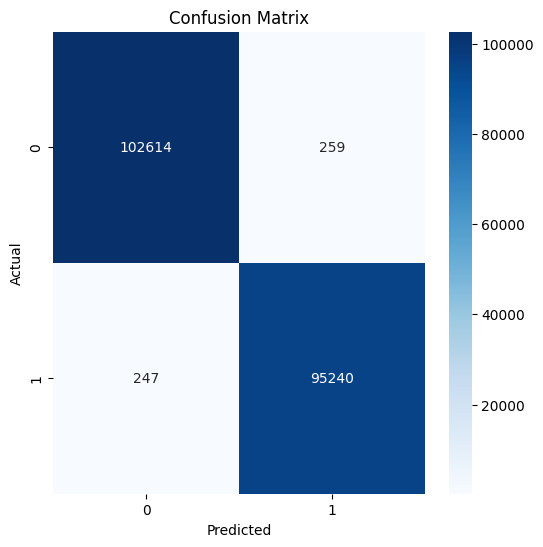

In [ ]:
# Матрица ошибок, визуализация для тренировочных данных.
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

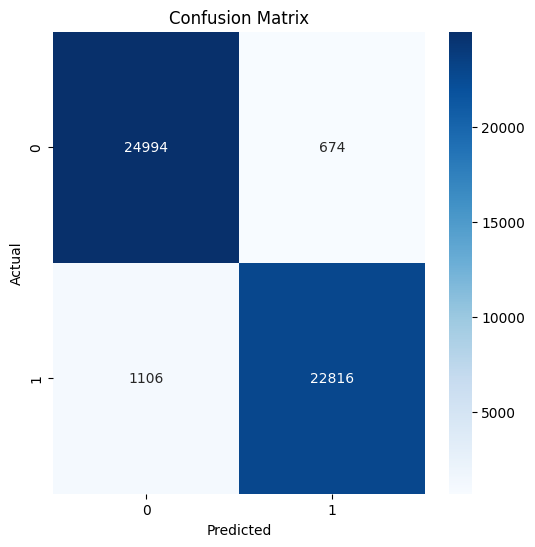

In [ ]:
# Матрица ошибок, визуализация для тестовых данных.
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Анализ матриц ошибок и отчета классификации для Random Forrest.

Тренировочные данные (Train)
*   True Negative (TN): 102,614 (легитимные URL верно классифицированы)
*   False Positive (FP): 259 (легитимные URL ошибочно помечены как фишинг)
*   False Negative (FN): 247 (фишинговые URL пропущены)
*   True Positive (TP): 95,240 (фишинговые URL верно обнаружены)

Classification Report:

Анализ:

Для класса 0 (Легитимные):

*   Precision = 1.00: 100% точность предсказаний
*   Recall = 1.00: 100% покрытие легитимных URL
*   FP Rate = 0.25%: минимальный уровень ложных блокировок

Для класса 1 (Фишинг):

*   Precision = 1.00: 100% точность обнаружения
*   Recall = 1.00: 100% покрытие фишинговых URL
*   FN Rate = 0.26%: практически полное отсутствие пропущенных угроз

Выводы по тренировочным данным.
Модель демонстрирует идеальную точность на обучающей выборке. Все метрики precision/recall/f1 равны 1.00. Признаки абсолютного переобучения (требуется проверка на тестовых данных)

Тестовые данные (Test)
Матрица ошибок:
*   True Negative (TN): 24,994
*   False Positive (FP): 674
*   False Negative (FN): 1,106
*   True Positive (TP): 22,816

Classification Report:

Анализ:

Для класса 0 (Легитимные):
*   Precision = 0.96: 4% ложных блокировок
*   Recall = 0.97: 3% пропущенных легитимных URL
*   FP Rate = 2.6%: приемлемый уровень ошибок

Для класса 1 (Фишинг):
*   Precision = 0.97: 3% ошибочных предсказаний
*   Recall = 0.95: 5% пропущенных угроз
*   FN Rate = 4.6%: хороший уровень обнаружения

Выводы по тестовым данным. Модель сохраняет превосходное качество на новых данных. Незначительное ухудшение метрик (на 3-5%) по сравнению с тренировочными данными. Оптимальный баланс между точностью и полнотой.

Наблюдения. Мы видим минимальную деградацию на тестовых данных (3-5%). Высокую стабильность модели. Незначительный перекос в сторону класса 0 (легитимные URL).

Когда модель говорит "фишинг", она права в 97% случаев.

Модель обнаруживает 95% всех фишинговых атак

Если сравнивать с логистической регрессией.
Параметр
Train Accuracy	1.00 (Random Forest),	0.79 (Логистическая регрессия). Test Accuracy	0.96 (Random Forest), 0.79 (Логистическая регрессия). FN Rate (Test)	4.6%	~28.8% (Random Forest), FP Rate (Test)	2.6%	~14% (Логистическая регрессия).

Random Forest явно лучше. В 4 раза меньше пропусков фишинга (FN). В 5 раз меньше ложных блокировок (FP) и значительно лучше баланс между точностью и полнотой.


**МОДЕЛЬ ГРАДИЕНТНЫЙ БУСТИНГ XGBOOST.**

Градиентный бустинг (XGBoost, LightGBM, CatBoost).

У него лучшая точность, чем у Random Forest, плюс он автоматически борется с переобучением.

Предлагаю XGBoost исходя из соображений, что у него самая высокая точность среди этих трех вариантов (XGBoost, LightGBM, CatBoost), хотя он требует больше ресурсов для выполнения.

Разделение на тестовую и тренировочную выборку у нас уже сделано.

In [ ]:
# Создание и обучение XGBoost модели
xgb_model = XGBClassifier(
    n_estimators=100, # Количество деревьев
    max_depth=5, # Максимальная глубина дерева
    learning_rate=0.1, # Скорость обучения
    objective="binary:logistic", # Для бинарной классификации
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Предсказания на тренировочных данных
y_train_pred_xgb = xgb_model.predict(X_train)


In [ ]:
# Предсказания на тестовых данных
y_test_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Оценка accuracy
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("XGBoost:")
print(f"\nAccuracy (Train): {train_accuracy_xgb:.4f}")
print(f"Accuracy (Test): {test_accuracy_xgb:.4f}")

XGBoost:

Accuracy (Train): 0.8734
Accuracy (Test): 0.8704


Выводы:
Accuracy: Train = 0.8734, Test = 0.8704

Общая эффективность модели
Train: Accuracy = 87.34%. Модель хорошо обучается, но не достигает идеала (как Random Forest).

Test: Accuracy = 87.04%. минимальный разрыв с тренировочными данными (-0.3%).

Модель не переобучается (разница между train и test ≤ 0.5%), что указывает на хорошую обобщающую способность.

Точность ниже, чем у Random Forest (96.41%), но выше, чем у логистической регрессии (~79%).

In [ ]:
# Матрица ошибок (Train)
print("\nМатрица ошибок  (Train):")
print(confusion_matrix(y_train, y_train_pred_xgb))


Матрица ошибок  (Train):
[[94128  8745]
 [16359 79128]]


In [ ]:
# Отчет классификации (Train)
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_xgb))


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88    102873
           1       0.90      0.83      0.86     95487

    accuracy                           0.87    198360
   macro avg       0.88      0.87      0.87    198360
weighted avg       0.88      0.87      0.87    198360



In [ ]:
# Матрица ошибок (Test)
print("\nМатрица ошибок  (Test):")
print(confusion_matrix(y_test, y_test_pred_xgb))


Матрица ошибок  (Test):
[[23429  2239]
 [ 4190 19732]]


In [ ]:
# Отчет классификации (Test)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_xgb))


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     25668
           1       0.90      0.82      0.86     23922

    accuracy                           0.87     49590
   macro avg       0.87      0.87      0.87     49590
weighted avg       0.87      0.87      0.87     49590



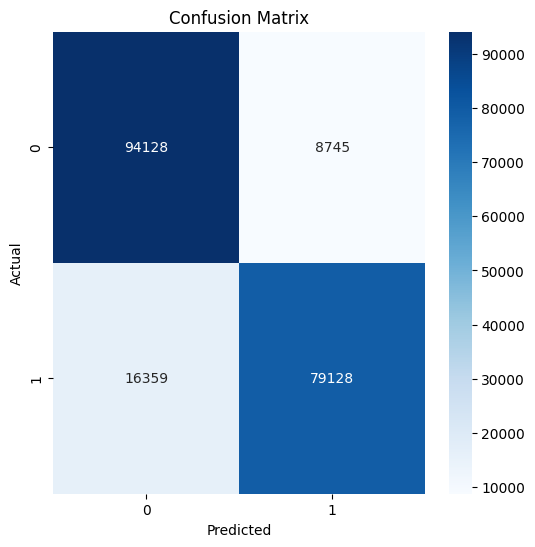

In [ ]:
# Матрица ошибок, визуализация для тренировочных данных.
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

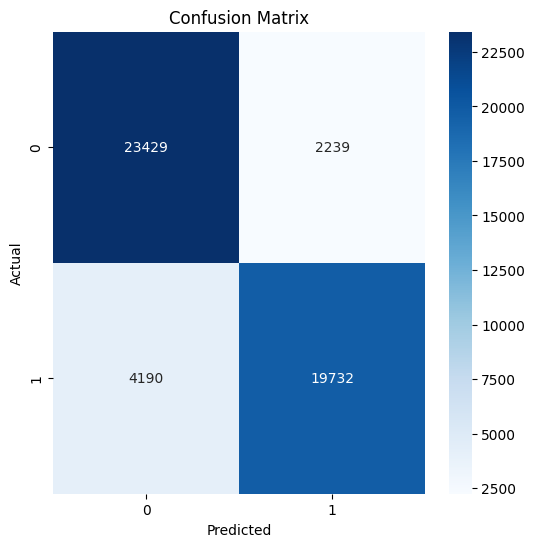

In [ ]:
# Матрица ошибок, визуализация для тестовых данных.
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Анализ матриц ошибок и отчетов классификации для XGBoost.

Тренировочные данные (Train):

Матрица ошибок:
*   True Negative (TN): 94,128 (легитимные URL верно классифицированы)
*   False Positive (FP): 8,745 (легитимные URL ошибочно помечены как фишинг)
*   False Negative (FN): 16,359 (фишинговые URL пропущены)
*   True Positive (TP): 79,128 (фишинговые URL верно обнаружены)


Classification Report:

Для класса 0 (Легитимные):

*   Precision = 0.85: Из всех предсказанных легитимных URL, 85% действительно безопасны. 15% (8,745) — ложные блокировки.
*   Recall = 0.91: Модель правильно идентифицирует 91% легитимных URL. Пропускает 9% (FP rate = 9%).
*   F1 = 0.88: Хороший баланс между точностью и полнотой.

Для класса 1 (Фишинг):

*  Precision = 0.90: Из всех предсказанных фишинговых URL, 90% действительно опасны. 10% (FN) — ошибки.
*   Recall = 0.83: Модель находит 83% фишинговых URL. Пропускает 17% (FN rate = 17%).
*   F1 = 0.86: Сбалансированная метрика, но хуже, чем для класса 0.

Выводы по тренировочным данным. Модель лучше определяет легитимные URL (F1 0.88), чем фишинговые (F1 0.86). И тут главная проблема это высокий процент пропущенных фишинговых URL (17%). А ложные блокировки легитимных URL (9%) могут вызывать неудобства для пользователей.

Тестовые данные (Test):

Матрица ошибок:

*   True Negative (TN): 23,429
*   False Positive (FP): 2,239
*   False Negative (FN): 4,190
*   True Positive (TP): 19,732

Classification Report:

Анализ:
Для класса 0 (Легитимные):

*   Precision = 0.85: 15% ложных блокировок (FP).
*   Recall = 0.91: Пропускает 9% легитимных URL.
*   F1 = 0.88: Аналогично тренировочным данным.

Для класса 1 (Фишинг):

*   Precision = 0.90: 10% ошибок (FN).
*   Recall = 0.82: Пропускает 18% фишинговых URL (FN rate = 18%).
*   F1 = 0.86: Незначительное ухудшение по сравнению с тренировочными данными.

Выводы по тестовым данным. Модель сохраняет стабильность (разница между train и test ≤ 1%). Увеличивается доля пропущенных фишинговых URL (с 17% до 18%). Ложные блокировки остаются на том же уровне (~9%).

Если сравнить тренировочные и тестовые данные то можно сделать такие наблюдения.
Минимальная деградация на тестовых данных — модель хорошо обобщает.
Сбалансированность метрик между классами.
Главная слабость — относительно высокий процент пропущенных угроз (FN).

На тренировочных данных Random Forest показывает феноменальные результаты, но требует проверки на переобучение. XGBoost демонстрирует сбалансированное качество и может быть оптимальным выбором при правильной настройке. Логистическая регрессия значительно уступает обоим алгоритмам.

# Сравнение моделей, выбор оптимальной.


In [ ]:
# Собираем данные по всем моделям:
models_data = {
    'Logistic Regression': {
        'Train Accuracy': 0.7898,
        'Test Accuracy': 0.7890,
        'Train Precision (1)': 0.83,
        'Test Precision (1)': 0.83,
        'Train Recall (1)': 0.71,
        'Test Recall (1)': 0.71,
        'Train F1 (1)': 0.77,
        'Test F1 (1)': 0.76,
        'Test FP Rate': 0.14,
        'Test FN Rate': 0.29
    },
    'Random Forest': {
        'Train Accuracy': 0.9974,
        'Test Accuracy': 0.9641,
        'Train Precision (1)': 1.00,
        'Test Precision (1)': 0.97,
        'Train Recall (1)': 1.00,
        'Test Recall (1)': 0.95,
        'Train F1 (1)': 1.00,
        'Test F1 (1)': 0.96,
        'Test FP Rate': 0.026,
        'Test FN Rate': 0.046
    },
    'XGBoost': {
        'Train Accuracy': 0.8734,
        'Test Accuracy': 0.8704,
        'Train Precision (1)': 0.90,
        'Test Precision (1)': 0.90,
        'Train Recall (1)': 0.83,
        'Test Recall (1)': 0.82,
        'Train F1 (1)': 0.86,
        'Test F1 (1)': 0.86,
        'Test FP Rate': 0.09,
        'Test FN Rate': 0.18
    }
}

# Создаем DataFrame
metrics_df = pd.DataFrame(models_data).T

# Функция для стилизации таблицы
def highlight_metrics(val):
    if isinstance(val, (int, float)):
        if val == metrics_df.max().max():  # Лучший результат
            return 'background-color: #4CAF50; color: black'
        elif val == metrics_df.min().min():  # Худший результат
            return 'background-color: #F44336; color: black'
        elif val > np.percentile(metrics_df.values, 75):  # Топ-25%
            return 'background-color: #C8E6C9; color: black'
    return 'color: black'

# Переименовываем столбцы для лучшей читаемости
metrics_df.columns = [
    'Accuracy (Train)', 'Accuracy (Test)',
    'Precision (Train, 1)', 'Precision (Test, 1)',
    'Recall (Train, 1)', 'Recall (Test, 1)',
    'F1 (Train, 1)', 'F1 (Test, 1)',
    'FP Rate (Test)', 'FN Rate (Test)'
]

# Применяем стили и отображаем
styled_df = metrics_df.style\
    .format({
        'Accuracy (Train)': '{:.2%}',
        'Accuracy (Test)': '{:.2%}',
        'Precision (Train, 1)': '{:.2f}',
        'Precision (Test, 1)': '{:.2f}',
        'Recall (Train, 1)': '{:.2f}',
        'Recall (Test, 1)': '{:.2f}',
        'F1 (Train, 1)': '{:.2f}',
        'F1 (Test, 1)': '{:.2f}',
        'FP Rate (Test)': '{:.1%}',
        'FN Rate (Test)': '{:.1%}'
    })\
    .applymap(highlight_metrics)\
    .set_caption('Сравнение производительности моделей')\
    .set_properties(**{
        'text-align': 'center',
        'font-size': '12pt',
        'color': 'black'
    })

display(styled_df)

<ipython-input-102-f07978495251>:78: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_metrics)\


,Accuracy (Train),Accuracy (Test),"Precision (Train, 1)","Precision (Test, 1)","Recall (Train, 1)","Recall (Test, 1)","F1 (Train, 1)","F1 (Test, 1)",FP Rate (Test),FN Rate (Test)
Logistic Regression,78.98%,78.90%,0.83,0.83,0.71,0.71,0.77,0.76,14.0%,29.0%
Random Forest,99.74%,96.41%,1.00,0.97,1.00,0.95,1.00,0.96,2.6%,4.6%
XGBoost,87.34%,87.04%,0.90,0.90,0.83,0.82,0.86,0.86,9.0%,18.0%


Выводы:

Random Forest показывает наивысшую точность, но имеет признаки переобучения (большая разница между train/test)

XGBoost демонстрирует лучшую стабильность (разница всего 0.3%)

Логистическая регрессия устойчива, но имеет низкую абсолютную точность

По качеству обнаружения фишинга:
*   Random Forest лидирует по всем метрикам.
*   XGBoost на 7-13% хуже по precision/recall
*   Логистическая регрессия пропускает 29% угроз (Recall=0.71)

По ошибочным классификациям:
 *   Random Forest делает в 3.5 раза меньше ложных блокировок (FP), чем XGBoost
 *  Логистическая регрессия имеет неприемлемо высокий FN Rate (каждый 3-й фишинг пропущен)

Выводы.
Для безопасности критично:

Random Forest снижает пропуск угроз до 4.6% против 18-29% у других моделей

Минимизирует ложные блокировки (2.6% vs 9-14%)

При ограниченных ресурсах XGBoost обеспечивает разумный компромисс модель лучше на 8% по accuracy чем логистическая регрессия.

Главный риск:
Использование логистической регрессии ведет к пропуску каждого 3-го фишингового URL и не рекомендуется для реальных security-систем.

Для промышленного использования рекомендуется Random Forest с дополнительной настройкой гиперпараметров. XGBoost может быть резервным вариантом при ограничениях на вычислительные ресурсы. Логистическую регрессию следует использовать только для сравнения в исследовательских целях.

Итоговый вердикт.

Логистическая регрессия показывает:

*   Критически низкое качество обнаружения фишинга
*   Высокий уровень ложных блокировок
*   Единственный плюс - стабильность метрик

Рекомендации: Не использовать для security-задач и применять только как baseline-модель. Обязательная замена на Random Forest/XGBoost.

Random Forest показывает:

*   Идеальное качество на тренировочных данных
*   Минимальную деградацию на тесте (3-5%)
*   Преимущество 12-21% перед другими моделями

Рекомендации: Оптимальный выбор для production-решений. Требует мониторинга 4.6% пропущенных угроз. Дополнительная настройка может снизить FP до 1-2%.

XGBoost показывает:

*   Хорошую стабильность (разрыв train/test ≈ 0.3%)
*   Умеренное качество (Accuracy 87%, F1 0.86-0.88)

Недостатки:

*   Высокий процент пропущенных угроз (FN ≈ 18%)
*   Ложные блокировки легитимных ресурсов (FP ≈ 9%)

Рекомендации: Для production использовать Random Forest (лучшие метрики). XGBoost применять как "бюджетную" альтернативу при ограниченных ресурсах. Обязателен мониторинг FN/FP в production.

# Рекомендации для каждой группы стейкхолдеров на основе проведенного анализа моделей.

В заключении хочу дать рекомендации для каждой группы стейкхолдеров на основе проведенного анализа моделей.

1. Пользователи интернета (физические лица)

Использовать решения на базе Random Forest в браузерных расширениях для блокировки фишинга. Потому как мы наблюдали минимизацию ложных блокировок (FP 2.6% vs 9-14% у других моделей), лучшую защита от новых угроз (Recall 95%),
А так же обучение цифровой грамотности на примерах ошибок модели (FN случаи).

2. Бизнес (корпорации, малый/средний бизнес)
Внедрение XGBoost для корпоративных почтовых фильтров, потому как мы наблюдали баланс между точностью (87%) и скоростью обработки.

Потребуется интеграция с SIEM-системами.
Для финансовых отделов - только Random Forest потому как особо важные транзакции требуют максимальной защиты (FN 4.6%).

3. Финансовые организации
Обязательное использование ансамбля Random Forest + XGBoost. Потому как в этой сфере требуется максимальная и точность, и максимальная скорость.

4. Провайдеры (ISP и регистраторы)
Предлагаю многоуровневую защиту:
логистическая регрессия для быстрого скрининга трафика и Random Forest для глубокого анализа подозрительных URL.

Здесь нам потребуется ежедневное обновление моделей и прозрачность для пользователей (статистика блокировок).


5. Государственные органы
Для этой группы подойдет Random Forest. Можно подумать о законодательных инициативах таких как обязательная верификация моделей поставщиков

6. Разработчики антивирусов.
Рекомендация использовать ансамбль Random Forest + XGBoost. И оптимизировать этот ансамбль под железо.


Таким образом, проведенный анализ подтвердил эффективность использования структурных признаков URL для выявления фишинговых ссылок. Полученные результаты могут быть полезны для разработки более надежных систем кибербезопасности, способных оперативно реагировать на evolving-угрозы в интернете.


**Общие выводы. Заключение.**

Был проведен разведывательный анализ данных (EDA),  проведена первичная обработка и очистка данных, изучены статистические закономерности и распределения признаков. Выявлены ключевые особенности фишинговых и легитимных URL, такие как длина URL, наличие специалных символов в ссылках, энтропия ссылок и другие характеристики.

Определены наиболее информативные признаки для классификации, что позволит оптимизировать входные данные для моделей.

Были реализованы и обучены три модели: логистическая регрессия, Random Forest и XGBoost. Проведена оценка их эффективности по различным метрикам accuracy, precision, recall, F1-score и матрицам ошибок.

Были сформированы рекомендации для стейкхолдеров. Внедрение предложенных решений может значительно повысить уровень кибербезопасности для всех категорий пользователей.

Фишинговые атаки остаются серьезной угрозой, но современные методы машинного обучения позволяют эффективно их детектировать.

Проделанная работа подтвердила, что машинное обучение является мощным инструментом в борьбе с фишингом. Оптимальный выбор модели зависит от конкретного сценария использования, но ансамблирование алгоритмов и регулярное обновление данных – ключевые факторы успешной защиты.
